# ADA Project: Welcome to the final analysis of **American Influence in the Cinema industry**

## Authors
- Group Name: ADACTYLOUS
    - Chloé Bouchiat
    - Claire Pinson
    - Germana Sergi
    - Luca Soravia
    - Marlen Stöckli

## Notebook's structure 

- The notebook reads as follow:




Import the main libraries and the needed datasets for the analysis
- The notebook follows the website organisation (accessible though this link): After recalling the findings of P2, one presents the results about the movies, then about the actors and finally about the plot summaries.

- Please note that the key results of P2 will be displayed as well as their interpretations. For low-level details and acessing the code, please refer to the P2 notebook (*results_P2.ipynb*).

- Finally, this notebook presents our main results and tries to avoid low-level calculations. Thus, one can find more details (if needed) about the analysis and the implementation in the following notebooks :
  - *Movie_success_index_P3.ipynb*: creation of an index to assess the success of a movie based on a linear regression fit on IMDb ratings;
  - *Actor_success_index_P3.ipynb*: creation of an index to assess the success of a given actor (plus détails ?)
  - *NLP_P3.ipynb*: assessment of american culture in plot summaries using Natural Language Processing, later referred as NLP, and using geographical locations and an American words lexicon.

Recalling from Milestone P2, the datasets where enriched as follows :
- movie.metadata enriched by IMDB ratings (coming from the IMDb non commercial datasets ([IMDb](https://developer.imdb.com/))
- character.metadata enriched with wikipedia actor's nationality ([DBpedia](https://www.dbpedia.org/about/)) and with the Golden Globes data ([Golden Globes](https://www.kaggle.com/datasets/unanimad/golden-globe-awards))
        


#### Recall of the repository structure:
```
📁 ada-2024-project-adactylous
│
├── 📄 results_P3.ipynb (where all ours final plots and analysis are)
├── 📄 results_P2.ipynb (where all our previous results are)
├── 📄 Movie_success_index_P3.ipynb 
├── 📄 Actor_success_index_P3.ipynb 
├── 📄 NLP_P3.ipynb 
├── 📄 American_vocab_P3.ipynb 
├── 📄 .gitignore (what is ignored during push and pull requests)
├── 📄 requirements.txt (install into your environment)
├── 📄 README.md
│
├── 📁 data
       │── 📄 actor_metadata_CMU.csv
       │── 📄 movie_metadata_CMU_IMDB.csv
       │── 📄 nationality.csv
       │── 📄 personas_metadata_CMU.csv
       │── 📄 plot_summaries_CMU.csv
       ├── 📁 NLP_datasets
            ├── 📁 NLP_GPE
            ├── 📁 NLP_lexicon
       ├── 📁 plots_website
├── 📁 src
    ├── 📁 scripts
        │── 📄 datasets_cleaner.py
        │── 📄 nationality_importer.py
        │── 📄 create_award_index.py
``` 

In [17]:
# Import the needed libarairies
import re
import pickle
import warnings # to ignore pandas version warning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for image display


from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler 
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle # for balancing train datasets for ordered regression

In [18]:
########################### Read datasets from repository's data folder ############################
movie_mtd = pd.read_table('data/movie_metadata_CMU_IMDB.csv', sep=',')
actor_mtd = pd.read_table('data/actor_metadata_CMU.csv', sep=',')
globes_index = pd.read_csv('data/globes_award_index.csv', sep=',')
# MAYBE DELETE
#personas_mtd = pd.read_table('data/personas_metadata_CMU.csv', sep=',')
plot_summaries_df = pd.read_csv('data/plot_summaries_CMU.csv', sep = ',', usecols= ['ID', 'Summary'])

In [19]:
# Set a global background theme for all our plots and ignore warnings
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

**Disclaimer** : the rendering of some of the plots below is not very sharp, this is because they were saved in other notebooks and are just shown here with `plt.imshow()` in order to make this notebook more concise.

# 1. Recall from the Milestone P2

## 1.1 General information about the dataset

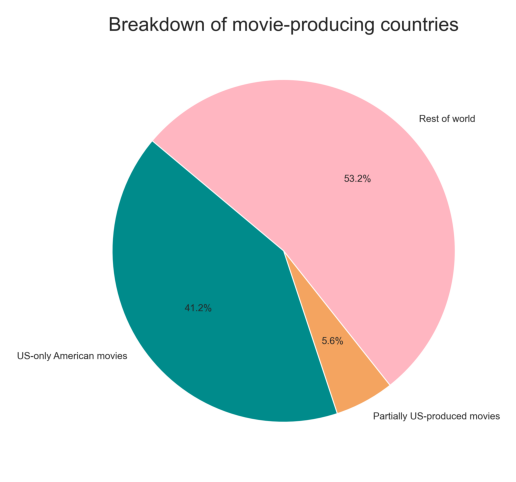

In [20]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/piechart_countries.png')

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

In this initial plot, we gain an overview of the dataset in relation to our research question: whether the predominance of the U.S. in the global film industry influences the production of non-American movies. The plot reveals that 41.2% of all movies in the dataset are U.S. productions, while some are co-productions between the U.S. and other countries. Slightly more than 50% of the movies in the dataset are not produced in the U.S.

From this, we deduce that the U.S. has a direct influence on about half of the movies in the dataset, as it is the country of production. This observation emphasizes the relevance of studying the U.S.'s influence on global cinema  and we can dive into the detailed analysis.

### Box office

**By analyzing basic stats on box office revenue, one obtains the first clues that show the benefits in terms of box office revenue of producing movies in the US strictly or even better, producing them only partially in the US. One recalls that these observations are not prooving any causality.**

### IMDb ratings

**One concludes that producing a movie only or partially in the US does not seem to lead to higher ratings on average by the public.**

### Translations

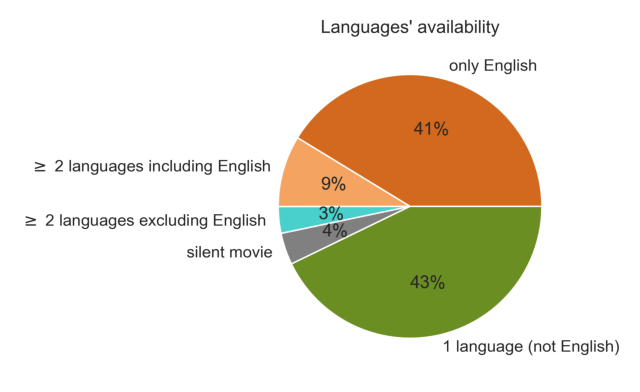

In [21]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/piechart_languages.png')

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

We observe on the figure above that 50% of the movies are available in English. Assuming that most of Americain people only speak fluently English, that means that "only" half of the produced movies are accessible to this population. Hence, we could be wondering if a movie available in English (i.e. whose public includes Americain people) generates more money than a movie not available in English ? 

After analysis, one concludes that movies available in English generate in average significantly more money that movies not available in English.

### Distribution of movies over time

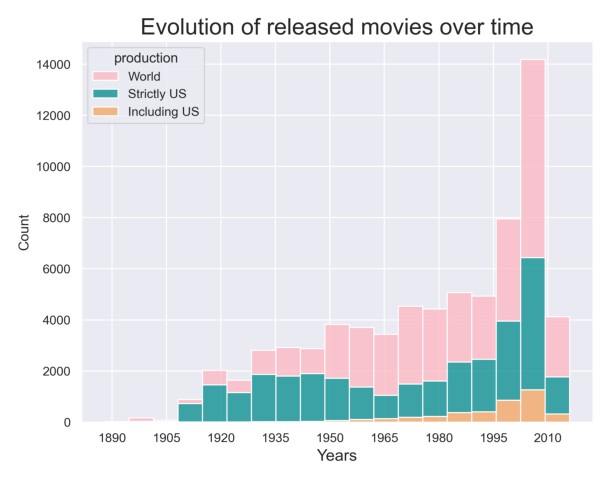

In [22]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/timeseries_release.png')

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

- We observe the a rapid increase around 1910;
- then a plateau during the Second World War (1939-1945);
- after WWII, the production of worlwide movies decreased slightly;
- around 1970, the production is increasing again and we observe the emergence of movies produced by of collaboration between US and other countries;
- finally, around 2000, there is a worlwide peak in movie production.

### Box office timeseries analysis

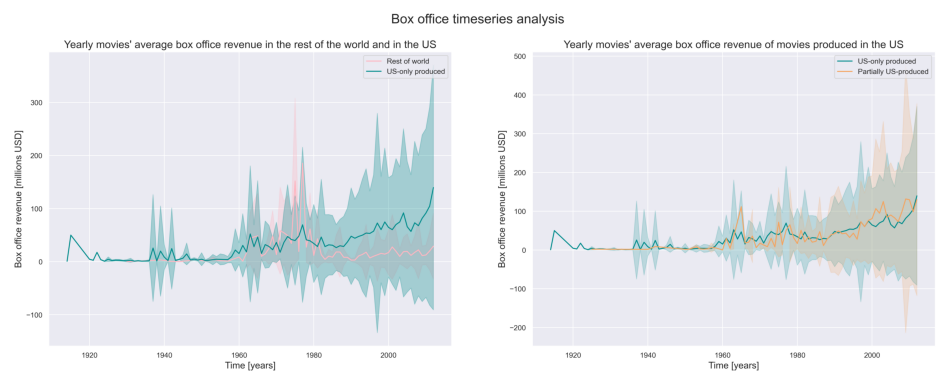

In [23]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/movies_boxoffice_timeseries.png')

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

The timeseries of yearly box office revenue is shown in the two above plots. First, one sees that from 1920 to 1940, movies were only produced in the US. This matches more or less with the creation of the first Hollywood studios in 1913 ([see here](https://en.wikipedia.org/wiki/Hollywood,_Los_Angeles)). Then, by comparing the yearly average box office revenue between US-only and non-US produced movies, one clearly sees that the average yearly box office for US-only produced movies is higher between 1920 and 1965 and in the period 1980-2016 compared to the Non-US produced movies. Between 1965 and 1980, the US-only produced movies generated less box office revenue per year than the ROW movies. Finally, the plot shows an increasing trend in yearly average box office revenue for US-only produced movies. For the movies produced in the rest of the world, a decreasing trend is to be seen until 1990. After this date, the yearly average box office revenue increases again but more slowly.<br>
<br>
Moving on to the right plot, one notices that first until the 60s, US-only produced movies were generating higher revenue on average yearly. After 1960, there is no clear distinction between average yearly box offices values for US-only and partially-US produced movies. However, since 2000 it seems that producing a film only partially in the US is beneficial in terms of yearly average box office revenues. This can be explained by the fact that nowadays, movies are generally not only produced in one country since many virtual effects companies are taking contracts worldwide. Furthermore, it is sometimes cheaper to produce a movies partially out of the US because labor is cheaper.<br>
<br>
Finally, one highlights the fact that the errors intervalls (filled with semi-transparent color) are sometimes covering negative values. This comes from the fact that the standard deviation is bigger than the mean for many movies (cf. section *Basic Stats*). This can be explained by the fact that in certain years some movies gerenerate a very high revenue as *Avatar* for example (cf. above) which "pull up" mean and standard deviation values.

### Pairwise analysis with Box Office, Runtime and IMDb Rating by Production Type
To recall, one concluded that the plots were not sufficient to provide clear insights about if the US-only and partially US-produced movies lead to better ratings when compared with box office revenue and runtime. 

One rejected the null hypothesis for all pairwise combinations. Furthermore, the correlation coefficients are not that low which contradicts the pairwise regression and second order polynomial analysis done earlier. However, the spearman test is well suited to capture non-linear relationships and thus might give more reliable results since the correlation seems to be non-linear.

### Investigation of genres & translations

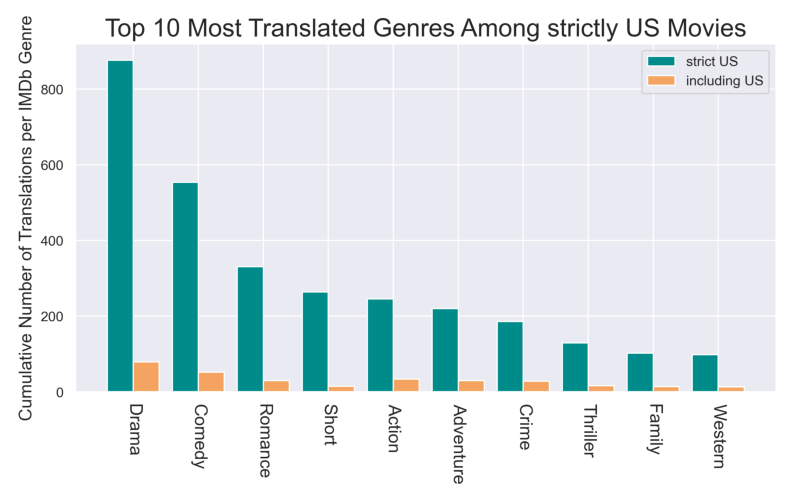

In [24]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/drama_US_translations.png')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

The genre DRAMA is cumulating the most translations among US movies by far. Regarding the partially US-produced movies, the cumulated translations by genre does not follow exactly the same trend, even though the 3 most translated genres are the same for both strictly and partially US-produced movies (the statistics for partially US-produced movies are not displayed).

**If one assumes that translation numbers are related to the export of movies, one can deduce from this plot that US drama movies are by far the most exported genre worldwide and thus USA could spread their culture through these movies.**

## 1.2 Character metadata enriched with DBpedia actor's nationality

Here, we begin by very simple data exploration, focusing on our main variables of interest (nationality, age, gender).

For the general evaluation of the dataset, we remark a roughly similar proportion of US and non-US actors. This is good for our further analysis because it means the dataset classes US/Foreign are balanced (in proportions at least). On the other hand, this finding shows how America is really ruling the cinematic industry, including actors nationality. Caution here though, as we need to further investigate the link between actors nationality and film production country, i.e. maybe American producers favor American actors, so a large proportion of US movies would then imply more US actors. 

Regarding the proportion of NaN values, around 1/3 of the actors do not have a nationality value. It's not perfect, but we can still use nationality for further analysis.


Grouping by nationality, we want to explore if the US/Foreign actors have different distribution of age and proportion of gender. Those variables will serve for our in-depth study and we need to verify if the distributions/proportions are similar between the two partitions of the dataset. If not, we would need to account for the difference when analysis and drawing conclusions on the data.

Regarding the results with the grouping, we observe similar values for gender ratio and roughly similar distribution of age. Interestingly, the age distribution seems to follow a normal law, slightly right-skewed, - an interesting insight to keep for later.

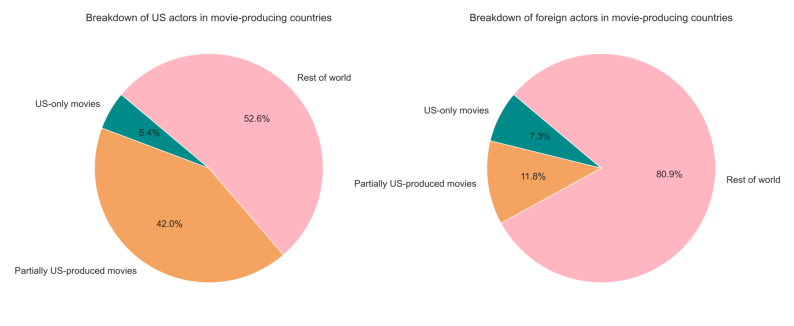

In [25]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/actors_breakdown_pychart.png')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

Going a little bit deeper in the analysis, we explore data proportions, following both actors nationality and films origin.

It will serve to desentangle the links between both variables. We specifically focus on those two variables to assess the influence of the movie origin on an actor's career (and success) and the factors (like actors nationality) that might affect this link.

**The outcome is mirroing our expectations for the foreign actors. Indeed, Foreign actors are mostly playing in foreign movies. On the other hand, American actors are playing as much in movies with US origin (including both only US and partially US) as in movies not originating from the US. Interestingly, American actors don't play so much in US-only movies.**

As we have roughly the same number of US and Foreign actors, we can say US actors export more to the rest of the world than Foreign actors export to the US, i.e. **we have a net flux of actors exporting from the US to the rest of the world - from a movie making perspective.**
In a later step, we will also put those figures in relations to the pie chart showing the fraction of movies per origin.

We need to keep in mind that nationality does not mean country of living. So, the fraction foreign actors playing in US movies may just include people actually living in the US and not really "foreigners" called specifically to play in an American movies. This reminder will help us analyse more truthfully the data.

In a second time, we investigated the type of movies (high box office or not) American v/s Foreign actors were playing in. Those tables play a role in our analysis of actors' career success per nationality. Specifically, we want to see if Foreign actors typically play in movies with higher box office revenue (that we can consider as "successful" - though we'll derive later a more precise index for that) than American ones. This is a first insight to verify our hypothesis that playing in American films boosts an actors' career, so foreigner are tempted to act in the US, feeding this dominance loop of American cinema.


**For both Foreign & American actors, it seems that playing in American movies (either partially or only US produced) is synonymous of higher median box office revenue, compared with rest of the world origin. Also, it seems actors playing in movies of a different origin than theirs (that is, American actors playing in rest of the world movies and vice versa) are associated with higher median box office revenues. Finally, movies co-produced by the US have, for both nationalities, the highest revenues among all film origins. But for co-produced films, American actors seem to play in movies with higher box offices (so "more successful" movies) than foreign actors.**

We also investigate the actors age depending on their nationality. It helped us get insights about the stereotypical actors casted for different movie origins and about the career stage of actors following their nationality and the movie origin they play in.

**Overall, one confirms that we have very similar age distributions following the actors nationalities (similar mean, median, std, max, min for both nationalities). Then, US actors are generally younger if casted in US movies (and more young as the film is only produced in the US). That's not true for Foreign actors, that are on average younger in non-US produced movies. Finally, the standard deviation around 14/15 years (for all) suggests are career range of around 30 years.**

The analysis of gender distribution among U.S. and foreign actors reveals that the pattern is similar across all three movie origin groups. **Specifically, female actors represent approximately 30%, while male actors account for around 60%. Interestingly, the gender imbalance is more pronounced in strictly U.S. movies, particularly for U.S. actors compared to foreign actors.**

Following our exploration of US/Foreign actors datasets, we delved into gender representation. 

Regarding the age series, we observe Foreign actresses are casted in movies with lower box office revenue after 20 years old, compared to men. The tendency is not monotonical for American actors, with men playing in higher revenue films only between 10 to 69 years old.

For both nationalities, we see very high revenues for the oldest actors, anomalies that might come from the low number of old actors - that are usually very good actors (keeping actors because asked for), playing in high revenue films.

Investigating our resarch question on actors careers and nationality, we are using the career start to indicate wether playing in American films boosts the actors' career or not. Here, we defined an early career as an actor casted in his first movie before turning eighteen years old. 

**From our results, we note that early careers are pretty rare.
More interestingly, it seems like US actors have more early careers than Foreign actors for US movies.**

### Does acting in an US movie help in kicking off the acting career?
Index of success : longevity of career + revenue of film + nb of films acted

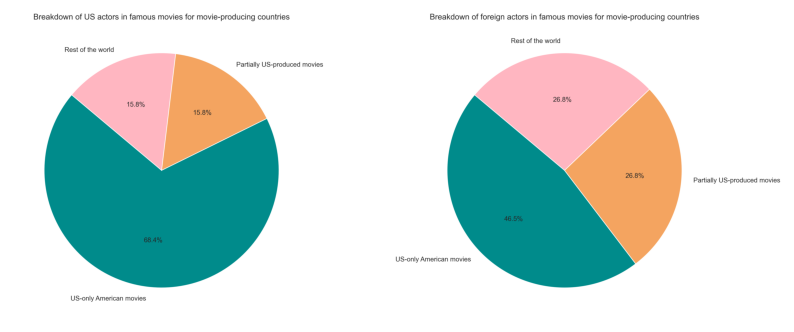

In [26]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/actors_countries_P2.png')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

The plot shows that American actors play more often in successful American movies than foreign actors do.

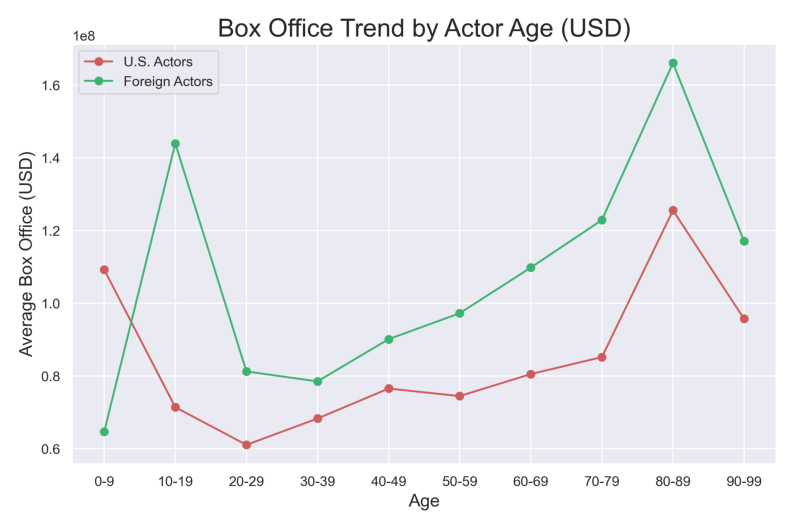

In [27]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/actors_box_office_age.png')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

**Interestingly, foreign actors play in more successful movies in terms of box office compared to American actors.** This holds for every age group except for actors younger than 10 years old. 

However, the number of actors per age group varies a lot which might lead to a distortion of the average box office revenue of the movies they played in. 

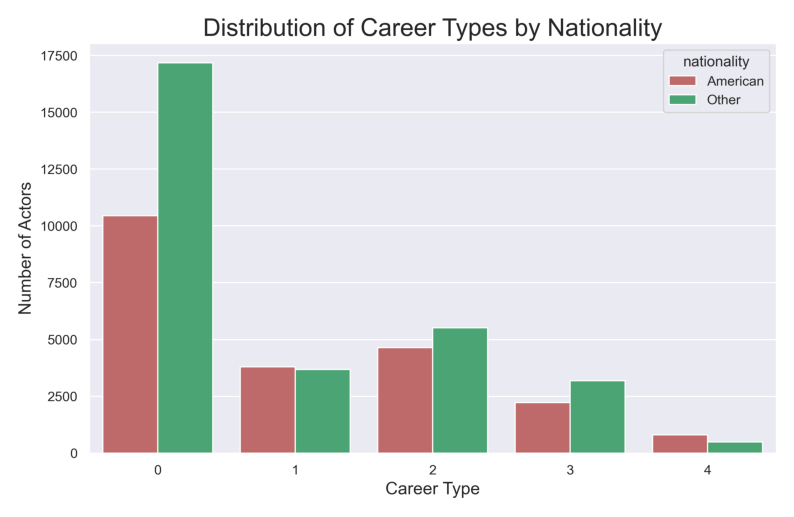

In [28]:
########################## Show plot ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/actors_kmeans.png')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

Interpretation of clusters (career types):
- 0: short and coincise career
- 1: long and active career
- 2: short and early career
- 3: short and late career
- 4: long, active and early career

Most actors visibly belong to group 0, characterized by a short and concise career. The proportion of American actors with such careers is smaller compared to that of foreign actors. **Therefore, this relatively unsuccessful career path is more common among foreign actors than American actors.**

Additionally, more American actors than foreign actors are found in group 4, which represents actors with long, active, and early-starting careers. **This group likely corresponds to very successful actors and is noticeably composed of more Americans than foreign actors.**

This analysis could be further refined by focusing only on actors appearing in the most successful movies, such as those measured by box office revenue or IMDb ratings. On the other hand, custering the career types for only American movies might also be insightful concerning character types appearing in American movies to analyse, which personas are transported to the spectator through cinema.



# 2. New results : Milestone P3

## Movie Success Index 

In order to compare the success of movies, one could use the IMDb ratings. However, this metric is not available for all movies and could limit the movies we can compare. Additionally, one could wonder with what features the IMDb ratings are corrolated with. 

### Dataset

To answer these questions, a linear regression was fit on movies with available IMDb ratings and some chosen input features : the box office revenue (log of the value in USD), the runtime, the languages, the actors, the countries of production, the release year and the CMU genres. Any movies containing a single NaN value in one of the input features is discarded. To be representative of the CMU dataset and to fight class-imbalance, this dataset was also containing the same percentage of partially US movies / only US movies and rest-of-the-world movies, leading to ~550 movies in total. 

### Pre-processing

During the pre-processing, a Multilabel binarizer is implemented. It acts similarly to the pandas built-in function `get_dummies`, but allows a given movie to have several labels. For instance, a movie produced in the US and in Japan is ending up with 1 in the columns 'united states of america' and 'japan' after the Multilabel binarizer is applied. The function was applied on the features 'languages', 'genres_CMU', 'actors' and 'countries'. In addition, to avoid model overfitting, the rare labels created by the Mutilabel binarizer were discarded. For instance, a given language that is not present more than 10 times in the whole dataset was cancelled (i.e. the corresponding column is deleted).

Finally, a standard scaling was implemented on the test, train and extended datasets. 

### Implementation

The linear model was fit on 80% of the dataset and evaluated on a test set. The results show that the model is explaining 42% of the variance on the train set and test set. However, the $R^2$ reached 47% when 5-fold cross validation was implemented. **These results show that the model is capturing some trend of the IMDb ratings, but is not accurate enough to be considered a modelling of the ratings.** Therefore, one used the predictions to created a new success metric, the Movie Success Index (MSI), slightly different from the IMDb rating.

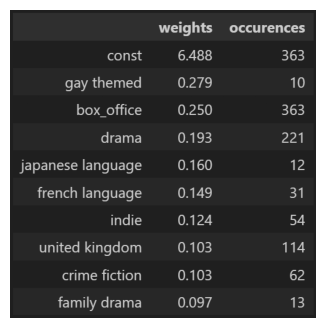

In [29]:
########################## Show TOP weights of the linear regression ##########################

# Load the figure
img = mpimg.imread('data/plots_website/screenshot_weights_MSI_3.png')

plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

By printing the weights of the linear regression, one observes that the only continous features correlated with IMDb ratings is the box office. This finding is permitted by the standard scaling of the features during the pre-processing which allows weights comparison.

The top feature is the gay themed genre. These movies are not much present in the IMDb ratings (10 movies rated in the train set). This genre is probably watched by people looking for this type of romance. They maybe do not have other expectations on the plot itself and watch them as entertainment, and hence are giving good reviews in IMDb website. However, this is not the case for all movies. For instance, some people watching famous saga could be disappointed by the quality of the plot or how the univers is matching to the corresponding books. If their expectations are not met, they will likely give a bad rating to the movie.

Drama movies are in general appreciated, which is consistent with our results from Milestone P2 : the US where exporting lots of drama movies, so the rest of the world is likely enjoying this genre. However, the genre drama is quite broad and many movies could be classified as such. Many movies embed conflicts between characters in their plots, allowing the public to relate... But would these films impact us as profoundly without the essence of drama?

The other features correlated with sucess are 3 languages, 1 country and the genre crime-fiction. This may suggest that some populations (namely French, Japanese and Indian) are suceptible to give better grades. Another possibility is that translations to those languages are made on movies that are very likely to be appreciated by these populations. 


### Predictions with the extended dataset
After evaluating the performance of the model with a dataset containing the IMDb ratings, the predictions were carried out with an extended dataset. This dataset still contains all the features needed for prediction with no NaN values, but does not necessarly contain the IMDb ratings. This entended dataset contains ~ 8 000 movies, which is way higher than the dataset used for training. 

### Crafting the MSI from the predictions

The predictions of this dataset are not at all in the range of IMDb and outliers were observed. Post-processing is therefore needed to recover an index bounded between 0 and 100. 

To do so, only the predictions between the 0.05% and 99.95% quantiles where rescaled to the range [0;100]. The outliers were assigned to 0 or 100.

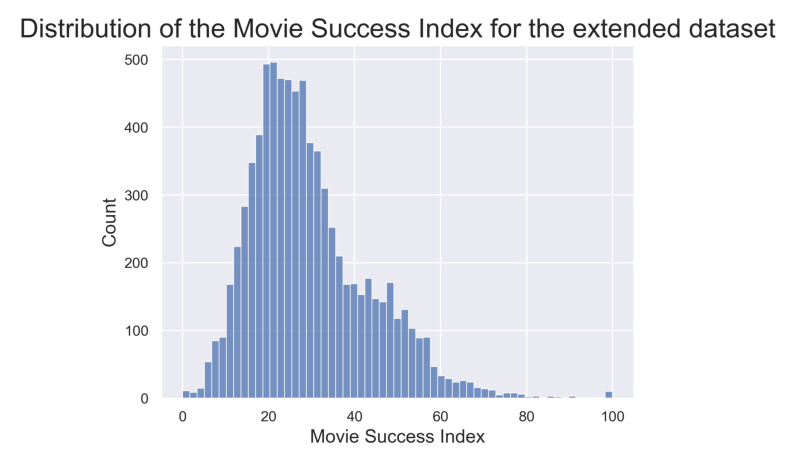

In [30]:
########################## Show MSI distribution ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/MSI_distribution.png')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

At first sight it can seem weird that the mean IMDb is around 6 but the mean MSI is around 25, but one must keep in mind that the MSI is a metric of success meant to be used for comparison and is not meant to be interpreted alone.

###  Now, going back to our 1st research question, are US movies more successful than other movies ?

The boxplots of MSI are shown below for movies produced by the US (partially or totally) and other movies :

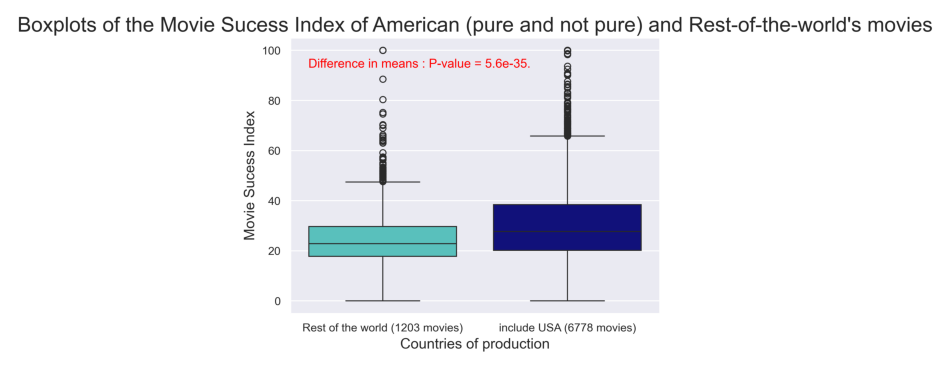

In [31]:
########################## Show MSI distribution ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/MSI_boxplot.png')

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()


The US movies are significantly a bit more successfull than movies not produced by the US. This result is different from the comparison conducted with IMDb ratings in the Milestone P2 (the average IMDb was not larger for movies produced by the US).
One also observes that the interquantile range of the MSI distribution is wider for the American movies, specifically the 75% quantile is larger for the Americain movies. This means that the MSI of American movies shows a greater variability. 

Note : the boxplots show normal distributions of the MSI, it is therefore possible to use the t-test to determine if the means are the same.

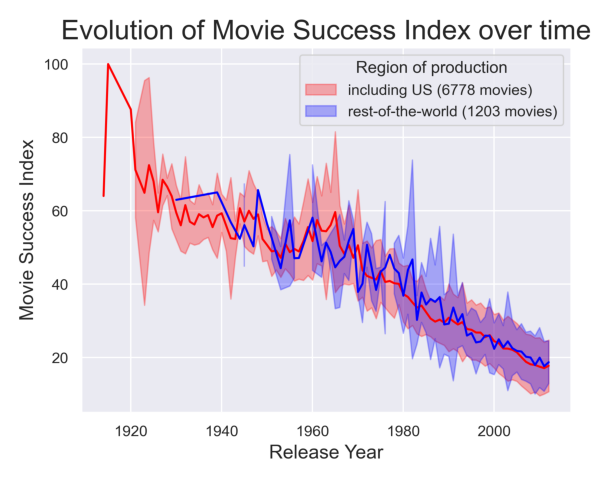

In [32]:
########################## Show MSI timeline ##########################

# Load the plot saved in another script
img = mpimg.imread('data/plots_website/MSI_timeseries.png')

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # remove automatic axis
plt.show()

This graph shows a clear trend of linear decrease of the MSI over time. Moreover, the MSI of US movies does not seem to be larger than movies from the rest of the world since the 70s. From 1910 to 1960, only US movies are present in the dataset and show high MSI (cf. P2). Hence, the previous statistics might have been biased by the lack of movies from the rest-of-the-world in the period 1910 - 1960. 

This trend of decreasing MSI over time could be explained by several reasons. First, old movies now somewhat have a historic dimension. Hence, the people who watched one of these movies probably actively looked for this specific kind of movies, as explained for gay themed movies. 
In addition, the old movies were not rated at their release as IMDb was created in 1993 ([Wikipedia of IMDb](https://en.wikipedia.org/wiki/IMDb)). Nowadays, the public is aware that the movies were produced decades before and has& maybe less expectations compared to a movie of their own time. Indeed, the producers didn't have the present technologies, so the public would tend to be less severe while grading, which was then reflected in the MSI. 

However, this timeline has some limitations. Indeed, the translations taken in account in the linear regression are not necessarly produced the same year that the movie is released. The translations can therefore improve the success of a movie as time goes on, similarly for the box office revenue. 
The success of a movie is therefore not a fixed metric in time but is evolving with the fans of cinema discovering the movie, even years after its release. For instance, some master pieces like 'Star Wars: Episode VI – Return of the Jedi' released in 1983 is a classic of the saga and still appreciated, even though it is only represented by a datapoint in the year 1983 on the above timeseries ([Star wars VI](https://en.wikipedia.org/wiki/Return_of_the_Jedi)).


### Conclusion

By construction, the MSI is not proportional to the IMDb and is made to allow comparison between movies. Based on the created Movie Success Index, American movies are significantly a bit more successfull in average than movies produced in the rest of the world. As the mean was computed over the entire timespan, this trend is probably due to the old movies produced by the US which have a large MSI. Nowadays, it doesn't seem that US movies are more succesfull than other movies, as shown by the above timeseries. 
Moreover, the genres Gay themed and Drama as well as the box office revenue seem to be key in the computation of the MSI.


## Actor Success Index

#### Explanation of the process
After having created a Movie Success Index, a similiar success index is created for actors. First, a dataset containing all nominations for Golden Globes from 1944 to 2020 is retrieved ([Kaggle, Golden Globes](https://www.kaggle.com/datasets/unanimad/golden-globe-awards)). It contains a datapoint for each nominated actor along with the final outcome of the nomination process (yes or no) and other features. Takind advantage of this information, an index for Golden Globes nominations was created and saved as a dataframe opened above (see src/scripts/create_award_index.py). Using this Golden Globe index as target variable, an ordered regression model is built to measure the success of an actor. 

**Disclaimer**: One implements here rather low-level computations which are needed to show how the model performs. This allows to better interpret the results in a critical manner.

The cells bellow guide through the creation process of the success index for actors.

In [33]:
# Match the index with the data
globes_index = globes_index.rename(columns={"nominee":"actor_name"})

#### Create useful features for the creation of the success index

In [34]:
df_actors = actor_mtd[['actor_name', 'birth_date', 'gender', 'height', 'nationality']].drop_duplicates(subset='actor_name').reset_index()

# Age
min_age = actor_mtd.groupby('actor_name', as_index=False)['age_at_release'].min()
min_age.rename(columns={'age_at_release': 'age_first_movie'}, inplace=True)
df_actors = df_actors.merge(min_age, on='actor_name', how='left')

max_age = actor_mtd.groupby('actor_name', as_index=False)['age_at_release'].max()
max_age.rename(columns={'age_at_release': 'age_last_movie'}, inplace=True)
df_actors = df_actors.merge(max_age, on='actor_name', how='left')

# Number of movies
count_movies = actor_mtd.groupby('actor_name', as_index=False)['title'].count()
count_movies.rename(columns={'title' : 'number_of_movies'}, inplace=True)
df_actors = df_actors.merge(count_movies, on='actor_name', how='left')

# Career length
df_actors['career_length'] = df_actors['age_last_movie'] - df_actors['age_first_movie']

In [35]:
# Famous movies

# Names of famous movies (top 10% based on box_office)
famous_movie_df = movie_mtd.sort_values('box_office', ascending = False)
len_revenue = int(len(famous_movie_df) * 0.1)
top_10_percent_movies = famous_movie_df.head(len_revenue)
names_fam_movies = top_10_percent_movies['title'].to_list()

# Count famous movies per actor
df_famous = actor_mtd[actor_mtd['title'].isin(names_fam_movies)]
actor_famous_count = df_famous.groupby('actor_name')['title'].nunique().reset_index()

# Merge the information with the original dataframe
all_actors = pd.DataFrame({'actor_name': actor_mtd['actor_name'].unique()})
actor_famous_count_full = pd.merge(all_actors, actor_famous_count, on='actor_name', how='left')
actor_famous_count_full['title'] = actor_famous_count_full['title'].fillna(0).astype(int)
df_actors['numb_fam_movies'] = actor_famous_count_full['title']

#### Prepare data for the model: Golden globes ground truth

In [36]:
# Merge the golden globe - based index

df_actors_merged = df_actors.merge(globes_index, on = 'actor_name', how = 'left')
# We suppose that the actors that are not in the globes_index dataframe have 0 nominees/awards
df_actors_merged = df_actors_merged.fillna(0) 

df_actors_merged.head()

,index,actor_name,birth_date,gender,height,nationality,age_first_movie,age_last_movie,number_of_movies,career_length,numb_fam_movies,nr_wins,nr_nominations,globes_index
0,0,Wanda De Jesus,1958.0,F,1.620,American,31.0,51.0,8.0,20.0,5,0.0,0.0,0.0
1,1,Natasha Henstridge,1974.0,F,1.780,Other,20.0,35.0,23.0,15.0,7,0.0,0.0,0.0
2,2,Ice Cube,1969.0,M,1.727,American,22.0,42.0,33.0,20.0,20,0.0,0.0,0.0
3,3,Jason Statham,1967.0,M,1.750,Other,30.0,44.0,31.0,14.0,26,0.0,0.0,0.0
4,4,Clea DuVall,1977.0,F,1.650,American,19.0,34.0,31.0,15.0,15,0.0,0.0,0.0


At this point, the dataset is strongly imbalanced because only the best actors are nominated for Golden Globes, which corresponds to a small portion compared to the whole actor dataset. Therefore, many actors have a Golden Globe index of 0.

In [37]:
# Prepare data for the regression

# The following features are considered important to train the model:
features = ['gender','height','age_first_movie','number_of_movies','career_length','numb_fam_movies']

X = df_actors_merged[features]
X = pd.get_dummies(X)
X = X.drop(columns=['gender_0']) # to avoid redundacy (std err, z, P>|z| were all nan)
Y = df_actors_merged['globes_index'] # target variable

In [38]:
# Split to test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

# Standardize data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Convert to DataFrame with aligned indices
X_train = pd.DataFrame(X_train_std, columns=X.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_std, columns=X.columns, index=X_test.index)

# Displaying the size of each sets
print(f"The training set has {X_train.shape[0]} samples (and a shape of {X_train.shape}).")
print(f"The test set has {X_test.shape[0]} samples (and a shape of {X_test.shape}).")

print(f"The target variable y for training has the shape {y_train.shape}.")
print(f"The target variable y for testing has the shape {y_test.shape}.")

The training set has 107263 samples (and a shape of (107263, 7)).
The test set has 26816 samples (and a shape of (26816, 7)).
The target variable y for training has the shape (107263,).
The target variable y for testing has the shape (26816,).


#### Balancing the datasets

In [39]:
# Undersampling to balance the dataset

# Combine the training data into a DataFrame
df_train = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
df_majority = df_train[df_train['globes_index'] == 0.0]
df_class_1 = df_train[df_train['globes_index'] == 1]
df_class_2 = df_train[df_train['globes_index'] == 2]
df_class_3 = df_train[df_train['globes_index'] == 3]

# Oversample the minority class
df_class_1_oversampled = df_class_1.sample(len(df_majority), replace=True, random_state=42)
df_class_2_oversampled = df_class_2.sample(len(df_majority), replace=True, random_state=42)
df_class_3_oversampled = df_class_3.sample(len(df_majority), replace=True, random_state=42)

# Combine the majority and oversampled minority classes
df_balanced = pd.concat([df_majority, df_class_1_oversampled, df_class_2_oversampled, df_class_3_oversampled])

# Separate features and target
X_train = df_balanced.drop('globes_index', axis=1)
y_train = df_balanced['globes_index']

# Shuffle the dataset to ensure random distribution
X_train, y_train = shuffle(X_train, y_train, random_state=42)

#### Ordered regression

In [40]:
# The used indices are ordered (0<1<2<3)

model = OrderedModel(y_train, X_train, distr='logit')  # The model automatically adds a constant
result = model.fit()  # Provide appropriate weights for each class
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:           globes_index   Log-Likelihood:            -4.7431e+05
Model:                   OrderedModel   AIC:                         9.486e+05
Method:            Maximum Likelihood   BIC:                         9.487e+05
Date:                Fri, 20 Dec 2024                                         
Time:                        21:13:39                                         
No. Observations:              423840                                         
Df Residuals:                  423830                                         
Df Model:                           7                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
height               0.0146      0.003      5.802      0.000       0.010       0.020
age_first_movie     -0.2183      0

An ordered regression has been implemented because the number of nominations and wins for a Golden Globes Award was translated to an ordered award index with the following definition (cf. *data_cleaner.py*): 
-    0 points if never nominated, 
-    1 point if at least once nominated
-    2 points if at least once won
-    3 points if more than once won

Looking at the results of the model on the training set, one observes that career legth, being male and the age at first movie are the most important coefficients of this regression model. All the coefficients have a p-value below 0.05, so they are statistically significant.

Finally, the values 0.0/1/0, 1.0/2.0 and 2.0/3.0 represent the boundaries of the classes and tell how easily the model can change its predictions. For instance, it is easy for the model to switch from predicting class 0 to predict class 1 since the coefficient is low. 

In [41]:
# Predict on test data
y_pred_probs = result.predict(X_test)
y_pred = y_pred_probs.idxmax(axis=1)  # Take the category with the highest probability

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Data: {accuracy:.4f}')

Accuracy on Test Data: 0.9347


Initially, the accuracy of the model was around 93% before the downsampling, indicating a tendency of the model to predict the umbalanced class (class 0), making few errors on the other, less relevant, classes. After balancing the dataset, the accuracy decreased to 85.25%, which is still an acceptable metric, indicating a quite accurate model. Therefore, the created success index based on the Golden Globes Awards seems to be robust.

#### Inference

In [42]:
# Predict on all data

X_new = df_actors[features]

# Pre process in the same way
X_new = pd.get_dummies(X_new)
X_new_std = scaler.transform(X_new)
X_new = pd.DataFrame(X_new_std, columns=X_new.columns, index=X_new.index)
y_pred_probs_new = result.predict(X_new)
y_pred_new = y_pred_probs_new.idxmax(axis=1)

In [43]:
# Add the predictions to the dataframe
df_actors['predicted'] = y_pred_new

# See the average index for American vs. Foreign actors
avg_index = df_actors.groupby('nationality')['predicted'].mean()
print(f'The average success indices are: \n{avg_index}')

The average success indices are: 
nationality
American    0.718827
Other       0.465978
Name: predicted, dtype: float64


Using the given coefficients, the American actors obtain an index 35% higher than the rest of the actors. While both indices being relatively small on a scale going from 0 to 3, Americans are closer to 1, and one recalls that an index of 1 would indicate all American actors being in average nominated at least once, which is impressive.

In [44]:
# Print descriptive statistics
stats = df_actors.groupby('nationality')['predicted'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
nationality,,,,,,,,
American,6512.0,0.718827,0.940413,0.0,0.0,0.0,1.0,3.0
Other,3483.0,0.465978,0.785918,0.0,0.0,0.0,1.0,3.0


#### Visualizations

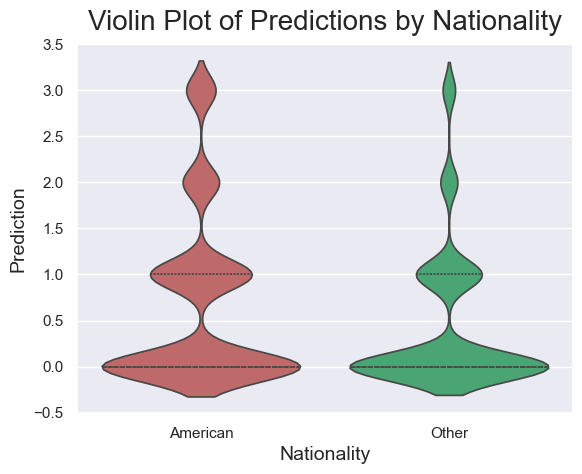

In [45]:
sns.violinplot(x='nationality', y='predicted', data=df_actors, palette = {'American': 'indianred', 'Other': 'mediumseagreen'}, scale='count', inner="quart")

plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Prediction", fontsize=14)
plt.title("Violin Plot of Predictions by Nationality", fontsize = 20, pad =10)
plt.savefig('data/plots_website/actors_violin_plot_prediction.png', dpi=300, bbox_inches='tight')
plt.show()

A violin plot is used to have insights on the internal distribution of the predictions. One notices that, for both groups, the predictions have a dense concentration in the class 0. However, the Americans have more predictions also for classes 1, 2 and in particular 3. These differences determine the clear difference in the average index

### Conclusion



In conclusion, after a necessary balancing of the dataset, the success index shows a higher average success of American actors. This is reasonable if one looks at the factors most influencing the predictor model. Indeed, from the previous analyses on the actor dataset, one proved that Americans tend to have an early career (coeff age_first_movie = - 0.22) which seems to bring more success in their later career. Moreover, the k-means analysis showed how Americans tend to have long careers (coeff career_length = 0.27) which results in more chance to play in successful movies and higher possibility of being nominated in the yearly ceremony. Finally, even if not deeply investigated before, also the gender and in particular being male (coeff gender_M = - 0.24) seem to affect.

## NLP Analysis on plot summaries


#### Basic statistics and preliminary analysis 

Subdataset creation to facilitate the analysis

In [46]:
# Creating deep copies of the original data frame to avoid messing it up
all_movies = movie_mtd.copy() # all movies in the dataset, no matter their production country
us_movies = movie_mtd.copy() 
us_partially_movies = movie_mtd.copy()
all_us_movies = movie_mtd.copy()
rest_world_non_US = movie_mtd.copy()

## Filtering the newly created dataframes for the analysis of box office revenues, IMDb ratings and runtimes
# Movies strictly produced in the US
us_movies = us_movies[us_movies['countries'] == 'United States of America']
# Movies partially produced in the US
us_partially_movies = us_partially_movies[(us_partially_movies['countries'].str.contains('United States of America') == True) & (us_partially_movies['countries'] != 'United States of America')]
# Contains the movies strictly produced in the US and the ones partially produced in the US
all_us_movies = all_us_movies[(all_us_movies['countries'] == 'United States of America') | (all_us_movies['countries'].str.contains('United States of America') == True)]

# Non-US movies
rest_world_non_US = rest_world_non_US[(rest_world_non_US['countries'].str.contains('United States of America') == False) & (rest_world_non_US['countries'] != 'United States of America')]

Opening of the plot summaries dataset

In [47]:
# Increase the display width to see more characters per column
pd.set_option('display.max_colwidth', None)  # this removes the column width limit

plot_summaries_df['Plot Summary Preview'] = plot_summaries_df['Summary'].apply(
    lambda x: ' '.join(re.split(r'(?<=[.!?])\s+', x)[:4]) # the re pattern checks if the sentence ends with ".!?" and the '.join' rebuilds the string after the split
)

# Sort the plot summaries according to the Wikipedia movie ID
plot_summaries_df_sorted = plot_summaries_df.sort_values(ascending = True , by= 'ID')

print(f"The size of the plot summaries dataset is {plot_summaries_df.shape}.")

# Show the first 4 sentences in the Preview column
plot_summaries_df[['ID', 'Plot Summary Preview']].head()

The size of the plot summaries dataset is (42303, 3).


,ID,Plot Summary Preview
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had earlier given jail sentence to Manapally in a corruption case. Induchoodan, who had achieved top rank in Indian Civil Service loses the post and Manapally Sudheeran ([[Saikumar enters the list of civil service trainees. We learn in flashback that it was Ramakrishnan the son of Moopil Nair , who had actually killed his classmate."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfortunately for the Kid, the woman ""belongs"" to notorious gangster Moose Moran , as does the money."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy returns to the tent to check on Azaria and is certain she sees a dingo with something in its mouth running off as she approaches. When she discovers the infant is missing, everyone joins forces to search for her, without success."


Merging the plot summaries dataset with the movie_mtd dataset in order to distinguish between US-only, partially US and non US produced (= ROW) movies

In [48]:
# Performing inner joins to be sure each movie kept after the merge has a plot summaries and filtering to keep only useful columnbs for the rest of the analysis
# ID column is not useful anymore so one can remove it
plot_summaries_all_movies = pd.merge(plot_summaries_df, all_movies, left_on= 'ID', right_on= 'wiki_movie_ID', how = 'inner').filter(items=['title', 'Summary', 'box_office', 'language', 'genres_IMDB', 'release_year', 'averageRating', 'numVotes'], axis = 1)

plot_summaries_us_movies = pd.merge(plot_summaries_df, us_movies, left_on= 'ID', right_on= 'wiki_movie_ID', how = 'inner').filter(items=['title','Summary', 'box_office', 'language', 'genres_IMDB', 'release_year', 'averageRating', 'numVotes'], axis = 1)

plot_summaries_us_partially_movies = pd.merge(plot_summaries_df, us_partially_movies, left_on= 'ID', right_on= 'wiki_movie_ID', how = 'inner').filter(items=['title', 'Summary', 'box_office', 'language', 'genres_IMDB', 'release_year', 'averageRating', 'numVotes'], axis = 1)

plot_summaries_RoW_movies = pd.merge(plot_summaries_df, rest_world_non_US, left_on= 'ID', right_on= 'wiki_movie_ID', how = 'inner').filter(items=['title','Summary', 'box_office', 'language', 'genres_IMDB', 'release_year', 'averageRating', 'numVotes'], axis = 1)

print(f"The size of the plot summaries dataframe merged with the dataset containing all the movies metadata is {plot_summaries_all_movies.shape}.")
print(f"The size of the plot summaries dataframe merged with the dataset containing US-only produced movies is {plot_summaries_us_movies.shape}.")
print(f"The size of the plot summaries dataframe merged with the dataset containing all the partially US-produced movies is {plot_summaries_us_partially_movies.shape}.")
print(f"The size of the plot summaries dataframe merged with the dataset containing all Non US-produced movies is {plot_summaries_RoW_movies.shape}.")

The size of the plot summaries dataframe merged with the dataset containing all the movies metadata is (42208, 7).
The size of the plot summaries dataframe merged with the dataset containing US-only produced movies is (17776, 7).
The size of the plot summaries dataframe merged with the dataset containing all the partially US-produced movies is (3015, 7).
The size of the plot summaries dataframe merged with the dataset containing all Non US-produced movies is (18105, 7).


Counting the number of plot summaries according to a given word range

In [49]:
def plot_counter(df, lower_bound=1, upper_bound=20): # setting default lower and upper bounds value
    """
    Function that counts the number of plot summaries containing a given number of words.

    Params:
        df (pd.DataFrame): DataFrame containing a column 'Summary'.
        lower_bound (int, optional): Minimum number of words in a plot summary (exclusive).
                                     Use None to apply no lower bound. Default is 1.
        upper_bound (int, optional): Maximum number of words in a plot summary (inclusive).
                                     Default is 20.
    Returns: The count of summaries within the specified word count range (int).
    """
    if 'Summary' not in df.columns:
        raise ValueError("The dataframe must have a column named 'Summary'.")

    # Compute plots counts once for efficiency
    plots_counts = df['Summary'].apply(lambda x: len(str(x).split())) # split words based on white spaces

    if lower_bound is None:
        # Apply only the upper bound
        return plots_counts[plots_counts >= upper_bound].count()
    else:
        # Apply both lower and upper bounds
        return plots_counts[(plots_counts > lower_bound) & (plots_counts <= upper_bound)].count()

# Initializing the need lists and dictionnary
list_name_df = ['All movies', 'US-only produced movies', 'Partially US-produced movies', 'Non US-produced movies']
list_df_plot_summaries = [plot_summaries_all_movies, plot_summaries_us_movies, plot_summaries_us_partially_movies, plot_summaries_RoW_movies]
list_set_number_words = [[1, 20], [20, 100], [100, 300], [300,500], [500, 1000], [1000, 2000], [2000, 3000]] # ranges of numbers of words in order to count the number of plots summaries falling in that range
dict_plot_count = {'All movies': [], 'US-only produced movies': [], 
                   'Partially US-produced movies': [], 'Non US-produced movies': [], 
                   }

# Use of "zip" will make the loop terminates when the shortest iterable is exhausted so one put it in the second for loop to make sure all the 7 words count interval are processed
dict_plot_count = {name: [] for name in list_name_df}
interval_names = [f"{low}-{high}" for low, high in list_set_number_words]

for interval in list_set_number_words:
    for df, dico_name in zip(list_df_plot_summaries, list_name_df):
        word_count = plot_counter(df, lower_bound = interval[0], upper_bound = interval[1])
        dict_plot_count[dico_name].append(word_count)

# Create DataFrame with interval names as index and title
df_count_plot_summaries = pd.DataFrame(dict_plot_count, index=interval_names)

# Add a title for the rows as an index
df_count_plot_summaries.index.name = "Word number Interval"

# Compute the total number of plot summaries for each columns and add it as the last row of the df
df_count_plot_summaries.loc["Total"] = df_count_plot_summaries.sum(axis=0)

print("The below table shows the number of plot summaries satisfying the number of word range (rows of the displayed dataframe)")
df_count_plot_summaries.head(8)

The below table shows the number of plot summaries satisfying the number of word range (rows of the displayed dataframe)


,All movies,US-only produced movies,Partially US-produced movies,Non US-produced movies
Word number Interval,,,,
1-20,397,133,11,180
20-100,12137,4639,531,5662
100-300,14406,5600,702,6905
300-500,5933,2745,450,2392
500-1000,7867,3973,1073,2501
1000-2000,1381,658,235,428
2000-3000,69,25,10,29
Total,42190,17773,3012,18097


One notices first that most of the plot summaries show a number of words between 100 and 300. Next, come the plots having 20-100 words in their summaries. One sees that there are very few plots summaries with more than 2000 words. Finally, one sees that with those word intervals one captures nearly all the movies. Indeed, the column *Total* for all the movies shows 42190 movies out of 42208 (see above cell) meaning that only 18 plots summarie shave more than 3000 words. One observe similar behavior for the US-only produced, Partially US-produced and Non Us-produced movies.

Visualization of the results

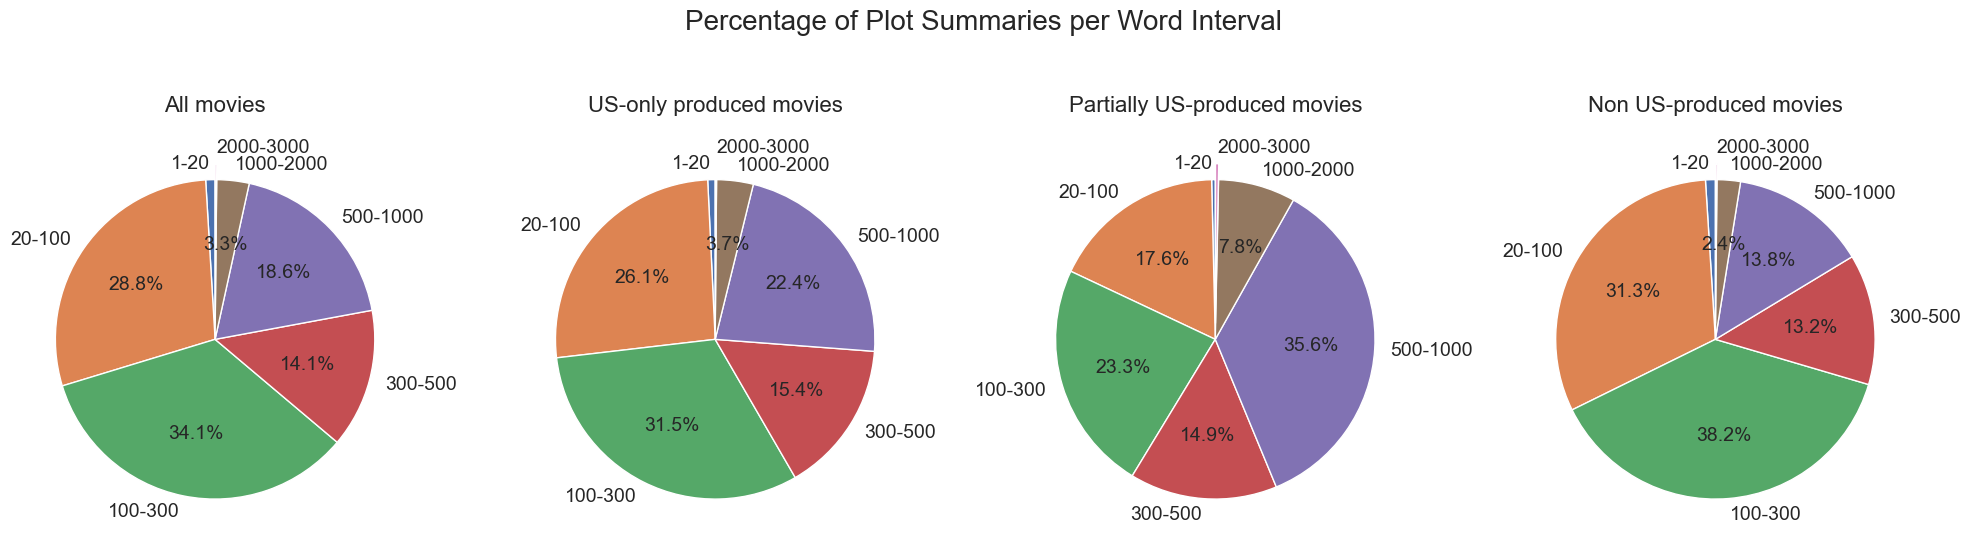

In [50]:
colors = sns.color_palette("pastel", len(df_count_plot_summaries.index))

def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct > 1 else ''  # Only display if percentage > 1%

plots = df_count_plot_summaries.iloc[:-1].plot.pie(
    subplots=True,
    figsize=(20, 8),
    title= False,
    legend=False,
    autopct=autopct_threshold,
    explode=(0, 0, 0, 0, 0, 0, 0.1),
    shadow=False,
    startangle=90,
    textprops={'fontsize': 14},
    color = colors
)

# Manually set the titles above the charts
titles = df_count_plot_summaries.columns
for ax, title in zip(plots, titles):
    ax.set_title(title, fontsize=16, y=1.05)  # Adjust y to move title above
    ax.set_ylabel('')  # Remove the default title on the left

# Global adjustments
plt.suptitle("Percentage of Plot Summaries per Word Interval", fontsize=20)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])
plt.savefig('data/plots_website/summaries_word_interval.png', dpi=300, bbox_inches='tight')
plt.show()

## NLP on plot summaries

One implements here Natural Language Processing (NLP) to assess the percentage of American culture in the plot summaries. The analysis is composed of two primary axes. First, one assesses the percentage of American culture by looking only at locations appearing in the plot summaries. Next, one uses a word lexicon representing the American culture to assess how "American" the plot summaries are. From a practical point of view, the analysis is implemented using the built-in Python library *Spacy* allowing to easily to implement a typical NLP pipeline. To increase the accuracy of the results, one uses the `en_core_web_trf` English transformer pipeline ([Spacy Models](https://spacy.io/models/en/)). This model leverages transformers and thus allow to "scan" the plot summaries more accurately. For more details on how this was implemented, please refer to the notebook *NLP_P3.ipynb*

### A) Assessing the American culture in plots summaries using GPE (i.e. location only)
One recalls that GPE stands for *Geopolitical entity, i.e. countries, cities, states* ([see here](https://spacy.io/usage/linguistic-features/)). The aim is here to assess the "percentage" of American culture in each plot summaries by only looking at the locations present in the plot. Indeed, if the plot summary, i.e. the summary of the story told by the movie, contains some amercian cities or states name(s), it "represents" in a way the amercian culture since the movie director chose the US as a location to tell his story (or part of his story in other locations are present).

For this first part, one does not use a set containing all cities, counties and states in the US but rather the python library *GeoPy* that allows to return the most probable location among all possible ones worldwide ([Geopy nominatim](https://geopy.readthedocs.io/en/stable/#nominatim)). For example, the city of *London* exists both in the UK and in the US, in Ohio ([London, Ohio, USA](https://en.wikipedia.org/wiki/London,_Ohio)). The only downside of this approach comes from the requests the code must perform to the *Geopy* API. This slows down the computations a bit since one must pause the program to avoid the server to block the ongoing requests. To partially solve this issue, one implements caching: a caching dictionary stores every scanned locations by the *Nominatim* function to avoid requesting the same locations many time during the processing.

Although this approach is slower than just reading a CSV file containing all US cities, counties and states and creating a Python set, it has the big advantage of not counting famous cities as London or Edinburgh as being part of the US. Indeed, many US cities are named from famous cities worldwide. For example the city of Edinburgh located in Scotland, also exists in the US ([Edinburgh, Indiana, USA](https://en.wikipedia.org/wiki/Edinburgh,_Indiana )). To conclude the use of the *Geopy* library and API allows to obtain robust results to assess the percentage of American culture by looking only at locations in the plot summaries.

### Visualization of the results

#### 1) Processing the US-only produced movies

In [51]:
# Visualization of the result:
df_GPE_us_only = pd.read_csv("data/NLP_datasets/NLP_GPE/us_only_movies_NLP_GPE.csv", sep=',')

# Percentages of american culture using GPE
mean_american_culture_GPE_us_only_movies = df_GPE_us_only['Percentage_american_culture'].mean()*100

# count the proportions of zeros
df_GPE_us_only['Percentage_american_culture'] = pd.to_numeric(df_GPE_us_only['Percentage_american_culture']).astype('float64')
proportion_0_percenatge_us = (len(df_GPE_us_only[df_GPE_us_only['Percentage_american_culture'] == 0.0])/len(df_GPE_us_only))*100

print(f"The mean american culture percentage for US-only produced movies using only GPE information is {mean_american_culture_GPE_us_only_movies:.2f} %.")
print(f"The percentage of zero values on the US-only GPE dataset is: {proportion_0_percenatge_us:.2f} %.")
print(f"Shape verification of the US-only GPE dataset: {df_GPE_us_only.shape}")

df_GPE_us_only.head(10)

The mean american culture percentage for US-only produced movies using only GPE information is 36.72 %.
The percentage of zero values on the US-only GPE dataset is: 57.02 %.
Shape verification of the US-only GPE dataset: (17776, 9)


,title,box_office,genres_IMDB,release_year,averageRating,numVotes,GPE_entities,GPE_US_frequencies,Percentage_american_culture
0,The Hunger Games,686533290.0,"Action,Adventure,Sci-Fi",2012.0,7.2,1022897.0,['Panem'],Counter(),0.000000
1,The Lemon Drop Kid,2300000.0,"Comedy,Crime,Music",1951.0,7.0,2303.0,"['New York City', 'Florida', 'New York', 'New York', 'Manhattan', 'Nyack', 'Nellie']","Counter({'New York': 2, 'New York City': 1, 'Florida': 1, 'Manhattan': 1, 'Nyack': 1, 'Nellie': 1})",1.000000
2,Dark Water,49483352.0,"Drama,Horror,Mystery",2005.0,5.6,66164.0,"['Jersey City', 'Roosevelt Island', 'Jersey City']","Counter({'Jersey City': 2, 'Roosevelt Island': 1})",1.000000
3,Sing,2260616.0,"Drama,Musical",1989.0,6.7,974.0,['Brooklyn'],Counter({'Brooklyn': 1}),1.000000
4,Meet John Doe,NaN,"Comedy,Drama,Romance",1941.0,7.6,15255.0,['Millsville'],Counter(),0.000000
5,Husband for Hire,NaN,NaN,2008.0,NaN,NaN,"['Texas', 'New Mexico']","Counter({'Texas': 1, 'New Mexico': 1})",1.000000
6,Exodus,NaN,NaN,1960.0,NaN,NaN,"['Israel', 'Cyprus', 'Palestine', 'Mandate Palestine', 'Famagusta', 'America', 'Palestine', 'Jerusalem', 'Abu Yesha', 'Gan Dafna', 'Israel', 'Jerusalem', 'Gan Dafna', 'Gan Dafna']","Counter({'Palestine': 2, 'America': 1})",0.214286
7,House Party 2,19438638.0,"Comedy,Drama,Music",1991.0,5.3,7205.0,[],Counter(),0.000000
8,Charlie Chan's Secret,NaN,NaN,1936.0,NaN,NaN,[],Counter(),0.000000
9,The Biggest Fan,NaN,NaN,2002.0,NaN,NaN,[],Counter(),0.000000


At first sight on the dataframe above, the results look robust. Now, the algorithm recognized correctly "Roosvelt Island" as a geographic location in the US ([Roosvelt Island, NY, USA](https://en.wikipedia.org/wiki/Roosevelt_Island)). However, "Palestine" was this time recognized as a city in Texas ([Palestine, Texas, USA](https://en.wikipedia.org/wiki/Palestine,_Texas)) altough the plot of the concerned movie *Exodus* only refers to Palestine in the context of the Middle East ([Exodus Movie](https://en.wikipedia.org/wiki/Exodus_(1960_film))). 

#### 2) Processing the partially US-produced movies

In [52]:
df_GPE_partially_us = pd.read_csv("data/NLP_datasets/NLP_GPE/us_partially_movies_NLP_GPE.csv", sep=',')


mean_american_culture_GPE_partially_us_movies = df_GPE_partially_us['Percentage_american_culture'].mean()*100

# count the proportions of zeros
df_GPE_partially_us['Percentage_american_culture'] = pd.to_numeric(df_GPE_partially_us['Percentage_american_culture']).astype('float64')
proportion_0_percenatge_us_partially = (len(df_GPE_partially_us[df_GPE_partially_us['Percentage_american_culture'] == 0.0])/len(df_GPE_partially_us))*100

print(f"The mean american culture percentage for partially US-produced movies using only GPE information is {mean_american_culture_GPE_partially_us_movies:.2f} %.")
print(f"The percentage of zero values on the partially US GPE dataset is: {proportion_0_percenatge_us_partially:.2f} %.")
print(f"Shape verification of the US-only GPE dataset: shape: {df_GPE_partially_us .shape}")

df_GPE_partially_us.head(10)

The mean american culture percentage for partially US-produced movies using only GPE information is 27.61 %.
The percentage of zero values on the partially US GPE dataset is: 60.17 %.
Shape verification of the US-only GPE dataset: shape: (3015, 9)


,title,box_office,genres_IMDB,release_year,averageRating,numVotes,GPE_entities,GPE_US_frequencies,Percentage_american_culture
0,A Cry in the Dark,6908797.0,NaN,1988.0,NaN,NaN,"['Azaria', 'Uluru']",Counter(),0.00
1,End Game,NaN,"Action,Thriller",2006.0,5.1,5745.0,[],Counter(),0.00
2,"Come Back, Africa",NaN,NaN,1960.0,NaN,NaN,"['Johannesburg', 'Sophiatown']",Counter(),0.00
3,Kehtaa Hai Dil Baar Baar,NaN,"Comedy,Drama,Romance",2002.0,4.7,204.0,"['India', 'New York']",Counter({'New York': 1}),0.50
4,Pieces,2032311.0,NaN,1982.0,NaN,NaN,['Boston'],Counter({'Boston': 1}),1.00
5,The Good Life,NaN,"Comedy,Drama",2007.0,6.4,2352.0,['Nebraska'],Counter({'Nebraska': 1}),1.00
6,Eastern Promises,17266000.0,NaN,2007.0,NaN,NaN,"['London', 'UK', 'London', 'Edinburgh']",Counter(),0.00
7,"Wait Until Spring, Bandini",NaN,Drama,1989.0,6.2,754.0,['Colorado'],Counter({'Colorado': 1}),1.00
8,Sophie's Choice,30036000.0,"Drama,Romance",1982.0,7.5,53987.0,"['Brooklyn', 'U.S.', 'Brooklyn', 'Virginia']","Counter({'Brooklyn': 2, 'Virginia': 1})",0.75
9,Until Death,NaN,"Action,Crime,Drama",2007.0,5.7,10503.0,"['New Orleans', 'New Orleans']",Counter({'New Orleans': 2}),1.00


First one notices again that the *Geopy* library gives some robust results. Indeed, one immediately sees that London and Edinburgh are not counted as US locations because the probability is much higher that the plot summary talks about London UK than about London, Ohio, USA. Moreover, for the movie *Come Back, Africa* that takes place in South Africa ([see here](https://en.wikipedia.org/wiki/Come_Back,_Africa)), one notices that the city of Johannesburg is not treated as being part of the State of California which is the desired output ([Johannesburg, California, USA](https://en.wikipedia.org/wiki/Come_Back,_Africa)). The US states such as Nebraska and Colorado are also perfectly recognised. One analyses the percentage of American culture in the plots, 5 cells below.

#### 3) Processing the partially Non-US (RoW) produced movies

In [53]:
df_GPE_RoW = pd.read_csv("data/NLP_datasets/NLP_GPE/Row_movies_NLP_GPE.csv", sep=',') 

# Percentages of american culture using GPE
mean_american_culture_GPE_RoW_movies = df_GPE_RoW['Percentage_american_culture'].mean()*100

# count the proportions of zeros
df_GPE_RoW['Percentage_american_culture'] = pd.to_numeric(df_GPE_RoW['Percentage_american_culture']).astype('float64')
proportion_0_percenatge_RoW = (len(df_GPE_RoW[df_GPE_RoW['Percentage_american_culture'] == 0.0])/len(df_GPE_RoW))*100

print(f"The mean american culture percentage for Non-US produced movies using only GPE information is {mean_american_culture_GPE_RoW_movies:.2f} %.")
print(f"The percentage of zero values on the Non US-produced GPE dataset is: {proportion_0_percenatge_RoW:.2f} %.")

df_GPE_RoW.head(10)

The mean american culture percentage for Non-US produced movies using only GPE information is 4.80 %.
The percentage of zero values on the Non US-produced GPE dataset is: 91.42 %.


,title,box_office,genres_IMDB,release_year,averageRating,numVotes,GPE_entities,GPE_US_frequencies,Percentage_american_culture
0,Taxi Blues,NaN,NaN,1990.0,NaN,NaN,[],Counter(),0.0
1,Narasimham,NaN,"Action,Drama",2000.0,7.6,2012.0,"['Bharathapuzha', 'Kerala', 'Poovally']",Counter(),0.0
2,Up and Down,2705163.0,NaN,2004.0,NaN,NaN,[],Counter(),0.0
3,Ghost In The Noonday Sun,NaN,NaN,1973.0,NaN,NaN,[],Counter(),0.0
4,Ashes to Ashes,NaN,Thriller,1999.0,7.1,23.0,"['London', 'England', 'London', 'France']",Counter(),0.0
5,The Rats of Tobruk,NaN,"Action,Drama,War",1944.0,5.4,316.0,"['Australia', 'Tobruk', 'New Guinea', 'Australia']",Counter(),0.0
6,Nee Sneham,NaN,NaN,2002.0,NaN,NaN,"['Kolkata', 'Goa', 'Goa', 'Delhi', 'Delhi', 'Mumbai', 'Mumbai']",Counter(),0.0
7,Bhagwan Dada,NaN,NaN,1986.0,NaN,NaN,"['Bhagwaan', 'Shantinagar', 'Shambu Dada’s', 'Shantinagar', 'Shantinagar', 'Bijli', 'Shantinagar', 'Shantinagar', 'Bhagwaan', 'Shantinagar', 'Shantinagar']",Counter(),0.0
8,Mr. & Mrs. '55,NaN,"Comedy,Musical,Romance",1955.0,7.1,688.0,['mumbai'],Counter(),0.0
9,Amici miei,NaN,"Comedy,Drama",1975.0,7.9,8171.0,['Florence'],Counter(),0.0


Again, by looking at the first 10 movies of the ROW movies, no errors are visible and the result looks robust. 

#### Basic statistical analysis of the three subdatasets used above for GPE

In [54]:
# american movies STRICTLY produced in the US
basic_stats_GPE_US = df_GPE_us_only['Percentage_american_culture'].describe()*100
# american movies PARTIALLY produced in the US
basic_stats_GPE_US_partial = df_GPE_partially_us['Percentage_american_culture'].describe()*100
# Rest of world (= Non Us movies)
basic_stats_GPE_ROW = df_GPE_RoW['Percentage_american_culture'].describe()*100

dict_results = {'US-only produced': [basic_stats_GPE_US.loc['50%'], basic_stats_GPE_US.loc['mean'], basic_stats_GPE_US.loc['std'], basic_stats_GPE_US.loc['max'], basic_stats_GPE_US.loc['min']], 
                'Partially US-produced': [basic_stats_GPE_US_partial.loc['50%'], basic_stats_GPE_US_partial.loc['mean'], basic_stats_GPE_US_partial.loc['std'], basic_stats_GPE_US_partial.loc['max'], basic_stats_GPE_US_partial.loc['min']],
                'Non US produced (ROW)': [basic_stats_GPE_ROW.loc['50%'], basic_stats_GPE_ROW.loc['mean'], basic_stats_GPE_ROW.loc['std'], basic_stats_GPE_ROW.loc['max'], basic_stats_GPE_ROW.loc['min']]}

df_basic_GPE_office = pd.DataFrame(dict_results, index = ['median [-]', 'mean [-]', 'std [-]', 'max [-]', 'min [-]'])
df_basic_GPE_office.style.format("{:.2f}") # to display only 1 decimal after the comma taking advantage of the Jupyter notebook environment

,US-only produced,Partially US-produced,Non US produced (ROW)
median [-],0.00,0.00,0.00
mean [-],36.72,27.61,4.80
std [-],45.23,39.41,18.26
max [-],100.00,100.00,100.00
min [-],0.00,0.00,0.00


Looking at the basic statistics on the percentages of American culture, one notices that the median is zero for all production types which indicates that a lot of movies don't contain any geographical locations in the US in their plot summaries. This can be explained by the fact that many movies in the dataset do not contain any GPE (Geopolitical Entities) because they are purely fictional works or because the plot is simply taking place outside the US. For example, *Star Wars*, *The Lord of the Rings*, and *Hunger Games* feature only imaginary locations that the NLP pipeline cannot and should not recognize.

Now, looking at the mean, one notices that US-only produced movies show the highest percentage of American culture with 36.7 %. This means that movies produced in the US tend on average to tell a story that takes place at least partially in the US. Indeed, during the creation of this American percentage culture, the NLP pipeline implemented considers all locations present in the plot summary's text and not only the locations in the US. Next, the partially US-produced show  on average a percentage of american culture of about 27 %, correponding to a 9 % decrease compared to US-only produced movies. One thus observes that films partially produced in the US tend to put less into spotlight the United States as country. Finally, movies produced outside of the US show on average 4.8 % of american culture, a 22.2 % decrease compared to partially US-produced movies. Once again, movies produced outside of the US tend to tell stories that are seldomly happening in the US.

The standard devitation is rather high for all three datasets.

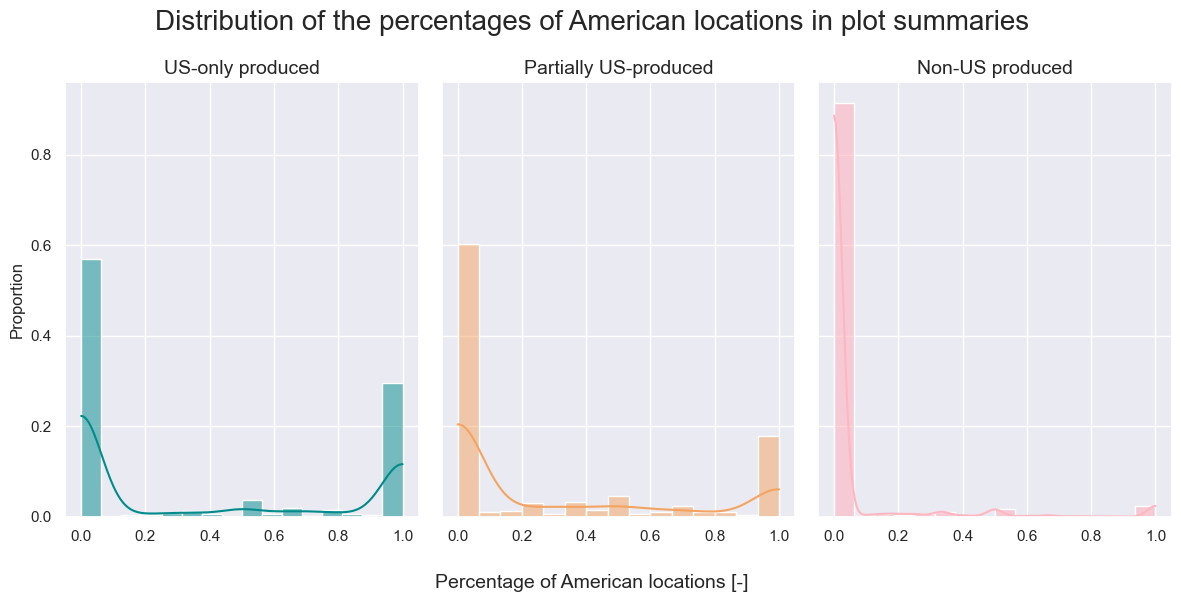

In [55]:
# First visualization

fig, axes = plt.subplots(1, 3, figsize = (12,6), sharey=True)
# stat = 'frequency' chosen since it represent the relative frequency (proportion) of movies in each bin, scaled to sum to 1.
# And it is useful for comparing distributions with different sample sizes
# bins = 'auto' produces too small bins if no log scale used
sns.histplot(df_GPE_us_only['Percentage_american_culture'], kde=True, stat='proportion', bins = 'auto', color='darkcyan', cumulative = False, log_scale= False, ax=axes[0]).set_title("US-only produced", fontsize=14)
axes[0].set(xlabel=None)
sns.histplot(df_GPE_partially_us['Percentage_american_culture'], kde=True, stat='proportion', bins = 'auto', color='sandybrown', cumulative = False, log_scale= False, ax=axes[1]).set_title("Partially US-produced", fontsize=14)
axes[1].set(xlabel=None)
sns.histplot(df_GPE_RoW['Percentage_american_culture'], kde=True, stat='proportion', bins = 'auto', color='lightpink', cumulative = False, log_scale= False, ax=axes[2], alpha = 0.6).set_title("Non-US produced", fontsize=14) 
axes[2].set(xlabel=None)
fig.suptitle("Distribution of the percentages of American locations in plot summaries", fontsize=20)
fig.supxlabel("Percentage of American locations [-]", fontsize=14)
fig.tight_layout()

plt.savefig('data/plots_website/summaries_distribution_GPE.png', dpi=300, bbox_inches='tight')
plt.show()

The distributions for US-only and for partially-US produced movies are bimodal. At first, one observes that more than 50% of all US-only produced movies don't contain any US locations in the plot summaries. But a substantial part of 30% of the US-only movies happen exclusively on US territory. As it can be observed, the partially US produced movies follow the same pattern but with a slightly increased proportion of movies not happening on US territory, whereas the proportion of plot summaries decreases to 20%. The plot to the right shows, that 90% of all movies produced strictly outside the US don't talk about US geographic locations.

Timeseries of American culture using GPE

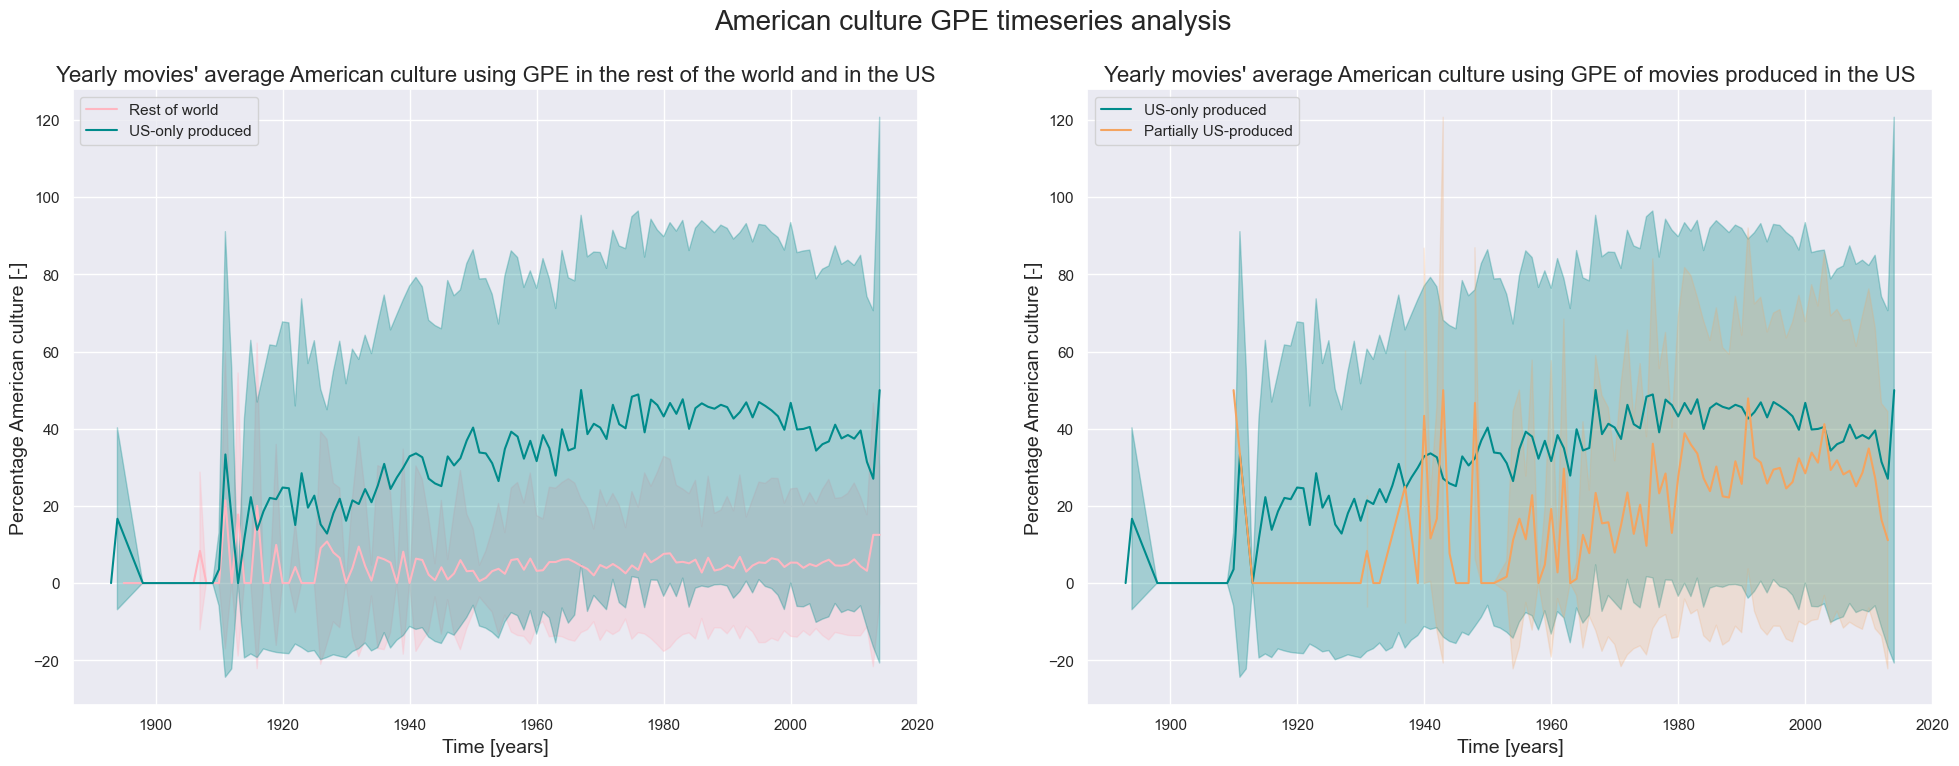

In [56]:
# time series of american culture using GPE

# average box office revenue for all movies per year world wide
avrg_ROW_USculture_per_year_GPE = df_GPE_RoW.groupby('release_year')['Percentage_american_culture'].mean()*100
std_ROW_USculture_per_year_GPE = df_GPE_RoW.groupby('release_year')['Percentage_american_culture'].std()*100

# average box office revenue for all movies per year in the US (movies STRICTLY produced in the US)
avrg_us_USculture_per_year_GPE = df_GPE_us_only.groupby('release_year')['Percentage_american_culture'].mean()*100
std_us_USculture_per_year_GPE = df_GPE_us_only.groupby('release_year')['Percentage_american_culture'].std()*100

# average box office revenue for all movies per year in the US (movies PARTIALLY produced in the US)
avrg_us_partial_USculture_per_year_GPE = df_GPE_partially_us.groupby('release_year')['Percentage_american_culture'].mean()*100
std_us_partial_USculture_per_year_GPE = df_GPE_partially_us.groupby('release_year')['Percentage_american_culture'].std()*100

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (24,8))
# US-only produced vs ROW
ax[0].plot(df_GPE_RoW['release_year'].drop_duplicates().sort_values()[:-1], avrg_ROW_USculture_per_year_GPE, label = 'Rest of world', color = 'lightpink')
ax[0].fill_between(df_GPE_RoW['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_ROW_USculture_per_year_GPE- std_ROW_USculture_per_year_GPE), y2 = (avrg_ROW_USculture_per_year_GPE+ std_ROW_USculture_per_year_GPE), linestyle='-', color='lightpink', alpha=0.3)
ax[0].plot(df_GPE_us_only['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_USculture_per_year_GPE, label = 'US-only produced', color = 'darkcyan')
ax[0].fill_between(df_GPE_us_only['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_USculture_per_year_GPE - std_us_USculture_per_year_GPE), y2 = (avrg_us_USculture_per_year_GPE+ std_us_USculture_per_year_GPE), linestyle='-', color='darkcyan', alpha=0.3)
ax[0].set_title("Yearly movies' average American culture using GPE in the rest of the world and in the US", fontsize = 16)
ax[0].set_xlabel("Time [years]", fontsize = 14)
ax[0].set_ylabel("Percentage American culture [-]", fontsize = 14)
ax[0].legend()

# US-only produced vs partially US-produced
ax[1].plot(df_GPE_us_only['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_USculture_per_year_GPE, label = 'US-only produced', color = 'darkcyan')
ax[1].fill_between(df_GPE_us_only['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_USculture_per_year_GPE - std_us_USculture_per_year_GPE), y2 = (avrg_us_USculture_per_year_GPE+ std_us_USculture_per_year_GPE), linestyle='-', color='darkcyan', alpha=0.3)
ax[1].plot(df_GPE_partially_us['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_partial_USculture_per_year_GPE , label = 'Partially US-produced', color = 'sandybrown')
ax[1].fill_between(df_GPE_partially_us['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_partial_USculture_per_year_GPE  - std_us_partial_USculture_per_year_GPE), y2 = (avrg_us_partial_USculture_per_year_GPE + std_us_partial_USculture_per_year_GPE ), linestyle='-', color='sandybrown', alpha=0.2)
ax[1].set_title("Yearly movies' average American culture using GPE of movies produced in the US", fontsize = 16)
ax[1].set_xlabel("Time [years]", fontsize = 14)
ax[1].set_ylabel("Percentage American culture [-]", fontsize = 14)
ax[1].legend()
fig.suptitle("American culture GPE timeseries analysis", fontsize = 20)
plt.savefig('data/plots_website/summeries_timeseries_GPE.png', dpi=300, bbox_inches='tight')
plt.show()

Starting with the left figure depicting the evolution of the average yearly percentage of American culture, one observes that for US-only produced movies this percentage tends to follow an increasing trend with an oscillation. On the contrary, the percentage of American culture for Non US-produced movies seems to stay roughly constant during the considered time span with values close to 5%.

Moving on to the right plot comparing the average yearly percentage of American culture between US-only and partially US-produced movies, one notes increasing trend with stronger oscillations for partially US-produced movies than for US-only produced movies. This can be explained by the fact that partially US produced movies are appearing around the 30s and that the dataset does not contain many movies to draw reliable statistics until the 70s. 

Interestingly, the non US-produced movies don't follow the increasing use of American locations in the plot summaries. This observation speaks against the hypothesis that non-US movies are influenced by American film industry and adapt their movies to plot summeries taking place on US territory. 


Finally, these results must be interpreted with a critical perspective. As already mentioned, many movies in the dataset do not contain any GPE (Geopolitical Entities) because they are purely fictional works. For example, *Star Wars*, *The Lord of the Rings*, and *Hunger Games* feature only imaginary locations that the NLP pipeline cannot and should not recognize. This fact tends to lower the calculated average percentage of American location references. Indeed, the mean is sensitive to outliers and overrepresented values. Additionally, movies with plots spanning both real and fictional locations may contain real existing locations although they play in fictional worlds. For instance, *Harry Potter* movies take place in the train station of London at the beginning but take place mostly in Hogwarts, a fictional place. A final limitation stems from the *Geopy* library itself. Some locations, such as Palestine, are incorrectly identified as being more likely in the US than in the Middle East ([Palestine, Texas, US](https://en.wikipedia.org/wiki/Palestine,_Texas)). Thus, while the Nominatim function of Geopy produces generally robust results, they are not entirely accurate.


### B) Assessing the American culture in plot summaries using the crafted American word lexicon
The goal is here to scan once again the plot summaries of US-only, partially US- and Non-US produced movies but this time with a handcrafted lexicon of words representing a realistic and typical sample of the american culture.

The American word lexicon is created using ChatGPT (see notebooks *NLP_P3.ipynb* and *American_vocab.ipynb*) ([Chat-GPT](https://chatgpt.com/)). The procedure is simple: one asks ChatGPT to generate a Python set of 200 words that are unique to the American culture and that truly represent it. Using ChatGPT in this case is relevant since it has been trained on the entire internet and thus has seen a tremendous amount of text resources about the United States such as review articles, Wikipedia pages, etc. To obtain a valuable list, one uses *ChatGPT 4o model* along with multiple list generations. The final list is taken as the intersection of all generated lists (NB: this directly implement online in the chat with ChatGPT and not in *American_vocab.ipynb*). Finally, to increase the granularity of the generated lexicon, one allows ChatGPT to generate multi-words expressions as for example, *slam dunk* or *white house*. All the words are written in lowercase to facilitate the integration of the set in *Spacy* NLP pipeline implmented in the *NLP_P3.ipynb* notebook.

However, one must keep in mind that generating "only" 200 words to create a lexicon representing American culture is not perfect and might not be enough to grasp the American culture. Indeed, adding more words will allow to better represent the American culture in the plot summaries. The choice of the number of words is then a trade-off between the running time of NLP scripts on the plot summaries and the targeted precision. A former studied approach was to scrap Wikipedia pages of the United States along with other Wikipedia country pages using built-in Python libraries. The concept was to retrieve the unique American words of the Wikipedia page by substracting the words appearing on the other countrys' Wikipedia pages, having removed the stop words before. This method was abondonned because of the huge number of irrelevant words retrieved by in this process. For example, if the word *table*, having nothing to do with American culture, was appearing in the United States' Wikipedia page but not in the pages of France, Canada and Germany, it was added to the lexicon. Furthermore, typical American words such as *hollywood*, *thanksgiving* and *cowboy* appeared in other Wikipedia pages, and were therefore removed from the lexicon during substraction what made those Widipedia pages unusable, unless these words would have been manually readded to the lexicon of American words. This explains the choice of using ChatGPT for the creation of the American lexicon.

Load the set of American words representing the lexicon created from Wikipedia data (see notebook *American_vocab.ipynb*) for more details.

In [57]:
with open('data/NLP_datasets/NLP_US_lexicon/unique_us_words_set.pkl', 'rb') as f:
    unique_us_words_set = pickle.load(f)

print(f"The lexicon of American words contains {len(unique_us_words_set)} words.")
print(f"The first 10 words of the lexicon are:\n {list(unique_us_words_set)[:10]}") # transform the us lexicon into a list to allow for indexing operation

The lexicon of American words contains 200 words.
The first 10 words of the lexicon are:
 ['amendment', 'motor mouth', 'costume', 'mount rushmore', 'freeway', 'democracy', 'yard sale', 'pickup truck', 'home plate', 'motel']


#### 1) Processing the US-only produced movies

In [58]:
df_US_lexicon_us_only = pd.read_csv("data/NLP_datasets/NLP_US_lexicon/us_only_movies_NLP_US_lexicon.csv", sep=',') 

# Percentages of american culture using GPE
mean_american_culture_US_lexicon_us_only_movies = df_US_lexicon_us_only['Percentage_american_culture_lexicon'].mean()*100

# count the proportions of zeros
df_US_lexicon_us_only['Percentage_american_culture_lexicon'] = pd.to_numeric(df_US_lexicon_us_only['Percentage_american_culture_lexicon']).astype('float64')
proportion_0_percentage_us_only_US_lexicon = (len(df_US_lexicon_us_only[df_US_lexicon_us_only['Percentage_american_culture_lexicon'] == 0.0])/len(df_US_lexicon_us_only)*100)

print(f"The mean american culture percentage for Non-US produced movies using only GPE information is {mean_american_culture_US_lexicon_us_only_movies:.2f} %.")
print(f"The percentage of zero values on the Non US-produced GPE dataset is: {proportion_0_percentage_us_only_US_lexicon:.2f} %.")

df_US_lexicon_us_only.head(10)

The mean american culture percentage for Non-US produced movies using only GPE information is 0.59 %.
The percentage of zero values on the Non US-produced GPE dataset is: 63.84 %.


,title,box_office,genres_IMDB,release_year,averageRating,numVotes,Total_tokens,Tokens_US_frequencies,Percentage_american_culture_lexicon
0,The Hunger Games,686533290.0,"Action,Adventure,Sci-Fi",2012.0,7.2,1022897.0,410,Counter({'president': 2}),0.004878
1,The Lemon Drop Kid,2300000.0,"Comedy,Crime,Music",1951.0,7.0,2303.0,438,Counter(),0.000000
2,Dark Water,49483352.0,"Drama,Horror,Mystery",2005.0,5.6,66164.0,375,Counter(),0.000000
3,Sing,2260616.0,"Drama,Musical",1989.0,6.7,974.0,296,"Counter({'diner': 3, 'high school': 1})",0.013514
4,Meet John Doe,NaN,"Comedy,Drama,Romance",1941.0,7.6,15255.0,290,"Counter({'baseball': 1, 'diner': 1})",0.006897
5,Husband for Hire,NaN,NaN,2008.0,NaN,NaN,182,Counter(),0.000000
6,Exodus,NaN,NaN,1960.0,NaN,NaN,409,Counter(),0.000000
7,House Party 2,19438638.0,"Comedy,Drama,Music",1991.0,5.3,7205.0,683,Counter({'campus': 5}),0.007321
8,Charlie Chan's Secret,NaN,NaN,1936.0,NaN,NaN,56,Counter(),0.000000
9,The Biggest Fan,NaN,NaN,2002.0,NaN,NaN,88,"Counter({'high school': 2, 'prom': 1})",0.034091


One observes, that in the plot summaries the percentages of American words from the crafted word lexicon are very low. Here, the column *Total_tokens* contains the words of the plot summeries after having removed the stop words from them and after lematization using *Spacy*. Despite the tokenization process of the plot summeries, the tokens are still numerous and the lexicon words rather rare which leads to low percentages.

In addition, the example of the dataframe presented above shows that the algorithm detects multi expression words. This is reassuring for the functioning of the process (see notebook *NLP_P3.ipynb*) and for a precise detection of typical American words.

#### 2) Processing the partially US-produced movies

In [59]:
df_US_lexicon_us_partially = pd.read_csv("data/NLP_datasets/NLP_US_lexicon/us_partially_movies_NLP_US_lexicon.csv", sep=',') 

# Percentages of american culture using GPE
mean_american_culture_US_lexicon_us_partially_movies = df_US_lexicon_us_partially ['Percentage_american_culture_lexicon'].mean()*100

# count the proportions of zeros
df_US_lexicon_us_partially['Percentage_american_culture_lexicon'] = pd.to_numeric(df_US_lexicon_us_partially['Percentage_american_culture_lexicon']).astype('float64')
proportion_0_percentage_us_partially_US_lexicon = (len(df_US_lexicon_us_partially [df_US_lexicon_us_partially['Percentage_american_culture_lexicon'] == 0.0])/len(df_US_lexicon_us_partially )*100)

print(f"The percentage of zero values on the Non US-produced GPE dataset is: {proportion_0_percentage_us_partially_US_lexicon:.2f} %.")
print(f"The mean american culture percentage for Non-US produced movies using only GPE information is {mean_american_culture_US_lexicon_us_partially_movies:.2f} %.")

df_US_lexicon_us_partially.head(10)

The percentage of zero values on the Non US-produced GPE dataset is: 63.85 %.
The mean american culture percentage for Non-US produced movies using only GPE information is 0.41 %.


,title,box_office,genres_IMDB,release_year,averageRating,numVotes,Total_tokens,Tokens_US_frequencies,Percentage_american_culture_lexicon
0,A Cry in the Dark,6908797.0,NaN,1988.0,NaN,NaN,206,Counter({'barbecue': 1}),0.004854
1,End Game,NaN,"Action,Thriller",2006.0,5.1,5745.0,177,Counter({'president': 8}),0.045198
2,"Come Back, Africa",NaN,NaN,1960.0,NaN,NaN,206,Counter(),0.000000
3,Kehtaa Hai Dil Baar Baar,NaN,"Comedy,Drama,Romance",2002.0,4.7,204.0,86,Counter(),0.000000
4,Pieces,2032311.0,NaN,1982.0,NaN,NaN,295,"Counter({'skateboard': 1, 'campus': 1})",0.006780
5,The Good Life,NaN,"Comedy,Drama",2007.0,6.4,2352.0,24,Counter(),0.000000
6,Eastern Promises,17266000.0,NaN,2007.0,NaN,NaN,287,Counter(),0.000000
7,"Wait Until Spring, Bandini",NaN,Drama,1989.0,6.2,754.0,28,Counter(),0.000000
8,Sophie's Choice,30036000.0,"Drama,Romance",1982.0,7.5,53987.0,196,Counter(),0.000000
9,Until Death,NaN,"Action,Crime,Drama",2007.0,5.7,10503.0,325,Counter(),0.000000


Same conclusion as the above cell.

#### 3) Processing the Non US-produced movies (RoW)

In [60]:
df_US_lexicon_RoW = pd.read_csv("data/NLP_datasets/NLP_US_lexicon/RoW_movies_NLP_US_lexicon.csv", sep=',') 

# Percentages of american culture using GPE
mean_american_culture_US_lexicon_RoW_movies = df_US_lexicon_RoW['Percentage_american_culture_lexicon'].mean()*100

# count the proportions of zeros
df_US_lexicon_RoW['Percentage_american_culture_lexicon'] = pd.to_numeric(df_US_lexicon_RoW['Percentage_american_culture_lexicon']).astype('float64')
proportion_0_percenatge_RoW_US_lexicon = (len(df_US_lexicon_RoW[df_US_lexicon_RoW['Percentage_american_culture_lexicon'] == 0.0])/len(df_US_lexicon_RoW)*100)

print(f"The mean american culture percentage for Non-US produced movies using only GPE information is {mean_american_culture_US_lexicon_RoW_movies:.2f} %.")
print(f"The percentage of zero values on the Non US-produced GPE dataset is: {proportion_0_percenatge_RoW_US_lexicon:.2f} %.")

df_US_lexicon_RoW.head(10)

The mean american culture percentage for Non-US produced movies using only GPE information is 0.25 %.
The percentage of zero values on the Non US-produced GPE dataset is: 82.79 %.


,title,box_office,genres_IMDB,release_year,averageRating,numVotes,Total_tokens,Tokens_US_frequencies,Percentage_american_culture_lexicon
0,Taxi Blues,NaN,NaN,1990.0,NaN,NaN,16,Counter(),0.000000
1,Narasimham,NaN,"Action,Drama",2000.0,7.6,2012.0,270,Counter({'supreme court': 1}),0.003704
2,Up and Down,2705163.0,NaN,2004.0,NaN,NaN,50,Counter(),0.000000
3,Ghost In The Noonday Sun,NaN,NaN,1973.0,NaN,NaN,32,Counter(),0.000000
4,Ashes to Ashes,NaN,Thriller,1999.0,7.1,23.0,217,Counter({'independence': 1}),0.004608
5,The Rats of Tobruk,NaN,"Action,Drama,War",1944.0,5.4,316.0,82,Counter(),0.000000
6,Nee Sneham,NaN,NaN,2002.0,NaN,NaN,212,Counter(),0.000000
7,Bhagwan Dada,NaN,NaN,1986.0,NaN,NaN,808,Counter({'pledge': 1}),0.001238
8,Mr. & Mrs. '55,NaN,"Comedy,Musical,Romance",1955.0,7.1,688.0,101,Counter({'freedom': 1}),0.009901
9,Amici miei,NaN,"Comedy,Drama",1975.0,7.9,8171.0,163,Counter(),0.000000


Same interpretation of the other two dataframes.

#### Basic statistical analysis of the three subdatasets used above for the American word lexicon

In [61]:
# american movies STRICTLY produced in the US
basic_stats_lexicon_US = df_US_lexicon_us_only['Percentage_american_culture_lexicon'].describe()*100
# american movies PARTIALLY produced in the US
basic_stats_lexicon_US_partial = df_US_lexicon_us_partially['Percentage_american_culture_lexicon'].describe()*100
# Rest of world (= Non Us movies)
basic_stats_lexicon_ROW = df_US_lexicon_RoW['Percentage_american_culture_lexicon'].describe()*100

dict_results_lexicon = {'US-only produced': [basic_stats_lexicon_US.loc['50%'], basic_stats_lexicon_US.loc['mean'], basic_stats_lexicon_US.loc['std'], basic_stats_lexicon_US.loc['max'], basic_stats_lexicon_US.loc['min']], 
                'Partially US-produced': [basic_stats_lexicon_US_partial.loc['50%'], basic_stats_lexicon_US_partial.loc['mean'], basic_stats_lexicon_US_partial.loc['std'], basic_stats_lexicon_US_partial.loc['max'], basic_stats_lexicon_US_partial.loc['min']],
                'Non US produced (ROW)': [basic_stats_lexicon_ROW.loc['50%'], basic_stats_lexicon_ROW.loc['mean'], basic_stats_lexicon_ROW.loc['std'], basic_stats_lexicon_ROW.loc['max'], basic_stats_lexicon_ROW.loc['min']]}

df_basic_stat_lexicon = pd.DataFrame(dict_results_lexicon, index = ['median [-]', 'mean [-]', 'std [-]', 'max [-]', 'min [-]'])

print(f"{100-proportion_0_percentage_us_only_US_lexicon:.2f}% of the US-only produced movies contain at least one word of the American word lexicon.")
print(f"{100-proportion_0_percentage_us_partially_US_lexicon:.2f}% of the Partially US produced movies contain at least one word of the American word lexicon.")
print(f"{100-proportion_0_percenatge_RoW_US_lexicon:.2f}% of the Non US produced movies (ROW) contain at least one word of the American word lexicon.")

df_basic_stat_lexicon.style.format("{:.2f}") # to display only 1 decimal after the comma taking advantage of the Jupyter notebook environment

36.16% of the US-only produced movies contain at least one word of the American word lexicon.
36.15% of the Partially US produced movies contain at least one word of the American word lexicon.
17.21% of the Non US produced movies (ROW) contain at least one word of the American word lexicon.


,US-only produced,Partially US-produced,Non US produced (ROW)
median [-],0.00,0.00,0.00
mean [-],0.59,0.41,0.25
std [-],1.30,0.95,0.85
max [-],20.00,12.50,15.00
min [-],0.00,0.00,0.00


Looking at the basic statistics on the percentages of American culture using the lexicon, one notices that the median is zero and for all production types which indicates that a lot of movies do not contain any of the 200 typical American words of the lexicon in their plot summaries. In fact, this was to be expected since a lot of movies talk of something else than American culture or American daily life. This can be explained by the fact that many movies in the dataset do talk about fictional cultures and therefroe the summary plot is simply not talking about American culture. For example, *Star Wars*, *The Lord of the Rings*, and *Hunger Games* feature only imaginary societies and do not contain the characteristic words. As visible from the percentages above, about 36% of Us-only and US-partially produced movies contain at least one word of the American word lexicon. For Non US produced movies, this percentage is two times lower. Now, looking at the mean, it is lower than 1% for all movies for the reason explained above. 

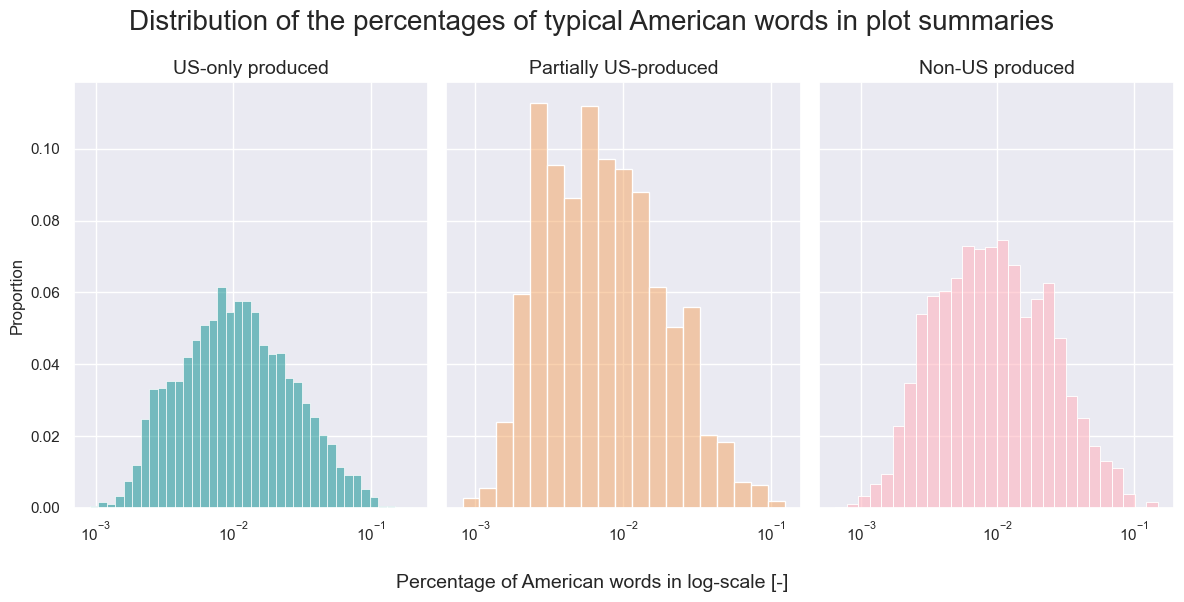

In [62]:
# First visualization

fig, axes = plt.subplots(1, 3, figsize = (12,6), sharey=True)
# stat = 'frequency' chosen since it represent the relative frequency (proportion) of movies in each bin, scaled to sum to 1.
# And it is useful for comparing distributions with different sample sizes
# bins = 'auto' produces too small bins if no log scale used
sns.histplot(df_US_lexicon_us_only['Percentage_american_culture_lexicon'], kde=True, stat='proportion', bins = 'auto', color='darkcyan', cumulative = False, log_scale= True, ax=axes[0]).set_title("US-only produced", fontsize=14)
axes[0].set(xlabel=None)
sns.histplot(df_US_lexicon_us_partially['Percentage_american_culture_lexicon'], kde=True, stat='proportion', bins = 'auto', color='sandybrown', cumulative = False, log_scale= True, ax=axes[1]).set_title("Partially US-produced", fontsize=14)
axes[1].set(xlabel=None)
sns.histplot(df_US_lexicon_RoW['Percentage_american_culture_lexicon'], kde=True, stat='proportion', bins = 'auto', color='lightpink', cumulative = False, log_scale= True, ax=axes[2], alpha = 0.6).set_title("Non-US produced", fontsize=14) 
axes[2].set(xlabel=None)
fig.suptitle("Distribution of the percentages of typical American words in plot summaries", fontsize=20)
fig.supxlabel("Percentage of American words in log-scale [-]", fontsize=14)
fig.tight_layout()

plt.savefig('data/plots_website/summaries_distribution_lexicon.png', dpi=300, bbox_inches='tight')
plt.show()

One uses a logarithmic x-axis in order to see the shape of the distributions. Indeed, the percentage of American culture being very low, they are difficult to interpret. However, the only downside is that the x-axis is slightly less easy to read. One notes that all three distributions are centered around 1 % of American culture and seem to follow a normal distribution with the log axis, hence the percentage of American words are following a logarithmic distribution.

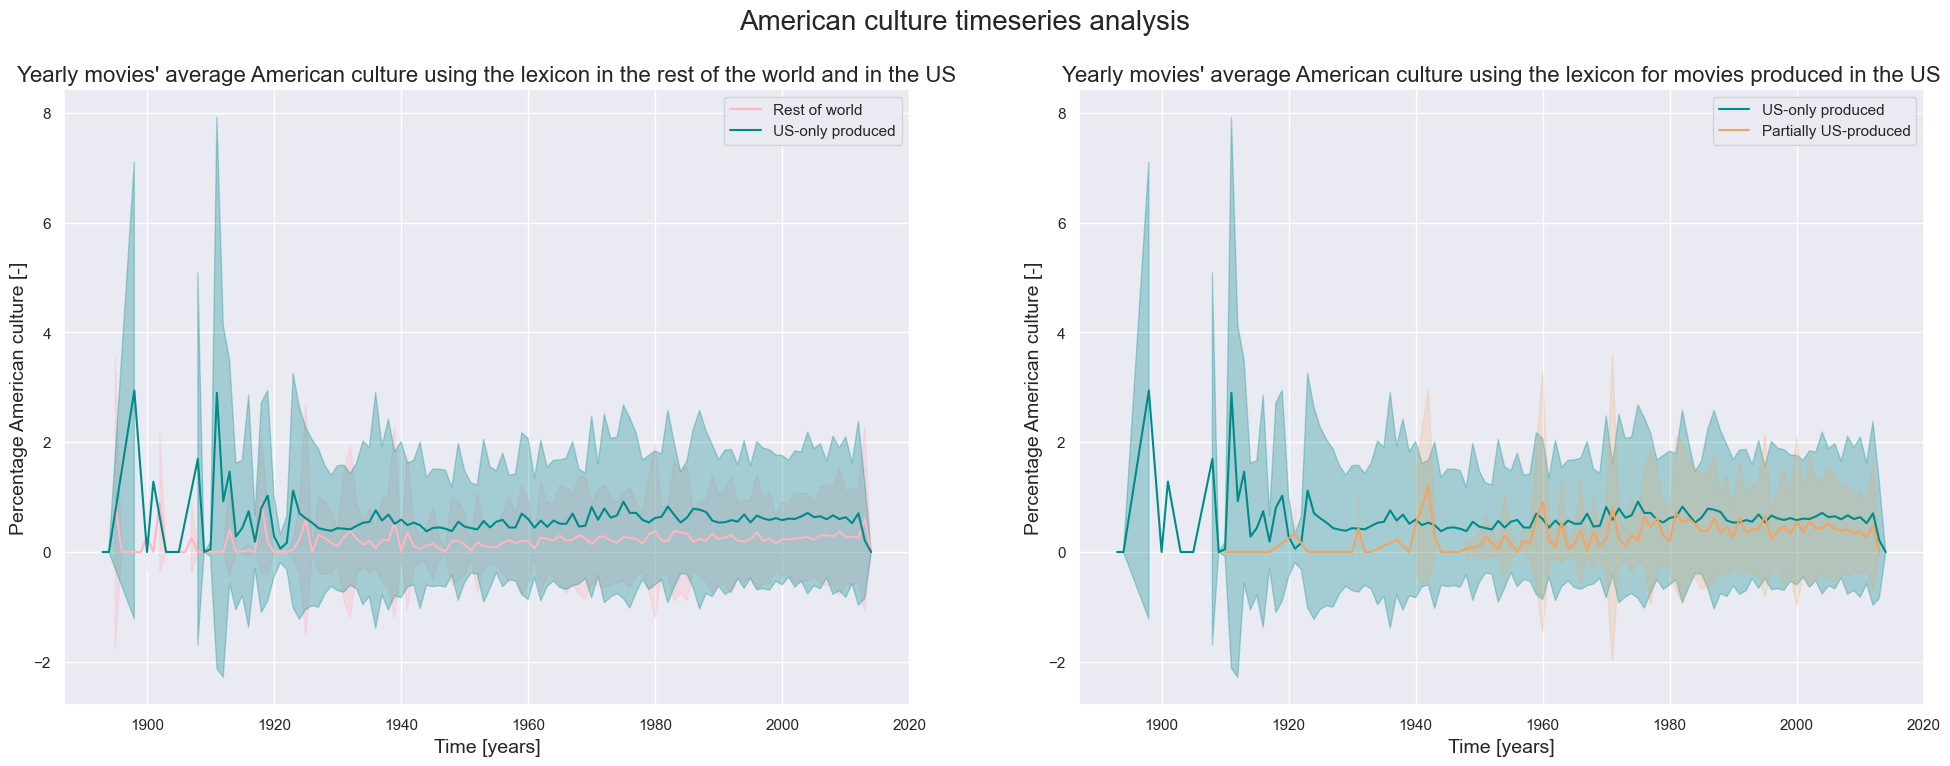

In [63]:
# time series of american culture using GPE

# average box office revenue for all movies per year world wide
avrg_ROW_USculture_per_year_lexcon = df_US_lexicon_RoW.groupby('release_year')['Percentage_american_culture_lexicon'].mean()*100
std_ROW_USculture_per_year_lexicon = df_US_lexicon_RoW.groupby('release_year')['Percentage_american_culture_lexicon'].std()*100
# average box office revenue for all movies per year in the US (movies STRICTLY produced in the US)
avrg_us_USculture_per_year_lexicon = df_US_lexicon_us_only.groupby('release_year')['Percentage_american_culture_lexicon'].mean()*100
std_us_USculture_per_year_lexicon = df_US_lexicon_us_only.groupby('release_year')['Percentage_american_culture_lexicon'].std()*100

# average box office revenue for all movies per year in the US (movies PARTIALLY produced in the US)
avrg_us_partial_USculture_per_year_lexicon = df_US_lexicon_us_partially.groupby('release_year')['Percentage_american_culture_lexicon'].mean()*100
std_us_partial_USculture_per_year_lexicon = df_US_lexicon_us_partially.groupby('release_year')['Percentage_american_culture_lexicon'].std()*100

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (24,8))
# US-only produced vs ROW
ax[0].plot(df_US_lexicon_RoW['release_year'].drop_duplicates().sort_values()[:-1], avrg_ROW_USculture_per_year_lexcon, label = 'Rest of world', color = 'lightpink')
ax[0].fill_between(df_US_lexicon_RoW['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_ROW_USculture_per_year_lexcon- std_ROW_USculture_per_year_lexicon), y2 = (avrg_ROW_USculture_per_year_lexcon+ std_ROW_USculture_per_year_lexicon), linestyle='-', color='lightpink', alpha=0.3)
ax[0].plot(df_US_lexicon_us_only['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_USculture_per_year_lexicon, label = 'US-only produced', color = 'darkcyan')
ax[0].fill_between(df_US_lexicon_us_only['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_USculture_per_year_lexicon - std_us_USculture_per_year_lexicon), y2 = (avrg_us_USculture_per_year_lexicon+ std_us_USculture_per_year_lexicon), linestyle='-', color='darkcyan', alpha=0.3)
ax[0].set_title("Yearly movies' average American culture using the lexicon in the rest of the world and in the US", fontsize = 16)
ax[0].set_xlabel("Time [years]", fontsize = 14)
ax[0].set_ylabel("Percentage American culture [-]", fontsize = 14)
ax[0].legend()

# US-only produced vs partially US-produced
ax[1].plot(df_US_lexicon_us_only['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_USculture_per_year_lexicon, label = 'US-only produced', color = 'darkcyan')
ax[1].fill_between(df_US_lexicon_us_only['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_USculture_per_year_lexicon - std_us_USculture_per_year_lexicon), y2 = (avrg_us_USculture_per_year_lexicon+ std_us_USculture_per_year_lexicon), linestyle='-', color='darkcyan', alpha=0.3)
ax[1].plot(df_US_lexicon_us_partially['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_partial_USculture_per_year_lexicon , label = 'Partially US-produced', color = 'sandybrown')
ax[1].fill_between(df_US_lexicon_us_partially['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_partial_USculture_per_year_lexicon  - std_us_partial_USculture_per_year_lexicon), y2 = (avrg_us_partial_USculture_per_year_lexicon + std_us_partial_USculture_per_year_lexicon ), linestyle='-', color='sandybrown', alpha=0.2)
ax[1].set_title("Yearly movies' average American culture using the lexicon for movies produced in the US", fontsize = 16)
ax[1].set_xlabel("Time [years]", fontsize = 14)
ax[1].set_ylabel("Percentage American culture [-]", fontsize = 14)
ax[1].legend()
fig.suptitle("American culture timeseries analysis", fontsize = 20)
plt.savefig('data/plots_website/summaries_timeseries_lexicon.png', dpi=300, bbox_inches='tight')
plt.show()

Interestingly, the presence of American culture for the three types of movie origins has not evolved much over time. Foreign movies have always used the least American words, especially between 1920 and 2015. Therefore, the worldwide American influence has not increased since 1920, or, is not traduced by movie synopses. For the partially-American movies, the percentage of American culture has increased since 1945, to reach nearly US-only levels. The trend can be explained by the increased importance of partially-American movies, in exponential growth since the 1940s, or by a greater influence of the USA over time. Furthermore, as mentionned before, despite the tokenization process of the plot summaries, the tokens are still numerous and the lexicon words rather rare which leads to low percentages.

#### Comparison of the two NLP methods: GPE vs US lexicon

In [64]:


# Dataframe summarizing the findings.

dict_NLP_american_culture = {'US-only produced movies': [df_basic_GPE_office.iloc[1,0], df_basic_stat_lexicon.iloc[1,0]], 
                   'Partially US-produced movies': [df_basic_GPE_office.iloc[1,1], df_basic_stat_lexicon.iloc[1,1]], 
                   'Non US-produced movies': [df_basic_GPE_office.iloc[1,2], df_basic_stat_lexicon.iloc[1,2]] 
                   }

index_names = ["GPE", "US lexicon"]

df_summary_NLP_results = pd.DataFrame(dict_NLP_american_culture, index = index_names)
df_summary_NLP_results.index.name = "Method"

print("The below dataset shows the mean percentage of American culture for the tow implemented methods.")
df_summary_NLP_results.style.format("{:.2f}") # to display only 2 decimals after the comma taking advantage of the Jupyter notebook environment

The below dataset shows the mean percentage of American culture for the tow implemented methods.


,US-only produced movies,Partially US-produced movies,Non US-produced movies
Method,,,
GPE,36.72,27.61,4.80
US lexicon,0.59,0.41,0.25


For all the reasons listed above, the percentages resulting from the US lexicon methods are two orders of magnitude lower that the results from the GPE method.

### Conclusion 


To conclude this analysis on plot summaries, one reflects on the third research question of this work (cf. README.me). Using NLP, one achieves a comprehensive assessment of the American culture in the plots summaries. The first method using GPE is more robust as it detects quite accurately the US locations in the plots summaries. Furthermore, it is also much less influenced by the frequency of the tokens than for the US word lexicon, leading to higher mean percentage of American culture. Indeed, the second method using the American lexicon is strongly impacted by the fact that the US tokens are not much represented in most of the plot summaries. This limitation comes from that fact that one decided to create a lexicon containing "only" 200 words which grasps a part of the American culture but not all of it. To summarize, the American culture in plot summaries can be more accurately assessed by looking only at geographical locations. To obtain more robust results using a word lexicon depicting American culture, one would need to consider more typical American words and to have more computational power as it was an obstacle for the full deployment of such analysis.